# a. Data gathering

- Source : [NYC MTA website](http://web.mta.info/developers/turnstile.html)
- Data Time period: 2021/03 - 2021/05 (around 3 months)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker


In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt" 
    dfs = []
    for week_num in week_nums: 
        file_url = url.format(week_num) 
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs) #combine files for each week
  
    
    
week_nums = [210306, 210313, 210320, 210327, 210403, 210410, 210417, 210424, 210501, 210508, 210515] # 11 weeks
turnstiles_df = get_data(week_nums) 
turnstiles_df.shape
turnstiles_df 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582
...,...,...,...,...,...,...,...,...,...,...,...
209034,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,05:00:00,REGULAR,5554,548
209035,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,09:00:00,REGULAR,5554,548
209036,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,13:00:00,REGULAR,5554,548
209037,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,17:00:00,REGULAR,5554,548


In [3]:
turnstiles_df.to_csv('mta_data_all.csv', header = False, index = False)

mta_data = turnstiles_df
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582


In [4]:
mta_data.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
209034,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,05:00:00,REGULAR,5554,548
209035,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,09:00:00,REGULAR,5554,548
209036,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,13:00:00,REGULAR,5554,548
209037,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,17:00:00,REGULAR,5554,548
209038,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,21:00:00,REGULAR,5554,548


### SQL  (Optional)
__Terminal__
1. create database (sqlite3 mta.db)
2. add table(CREATE TABLE...)
3. insert file to table (.import mta_data_all.csv mta_data)


__How to import all_data  from panda csv df to SQL then circle back on Python ?__
- STEPS:
    1. __pd__ :add mta_data_all.csv to table
    2. __SQL terminal__ : go to the directory where created the database and table, open sqlite and that database and then run the code as before 
            (with .mode csv and .import…)
    3. __Python SQL sqlachemy__ :use Python sqlalchemy to query and check

In [5]:
### Optional: SQL

# from sqlalchemy import create_engine

# engine = create_engine("sqlite:///mta.db")
# all_data = pd.read_sql('SELECT * FROM mta_data;', engine)

# b. Data Cleaning 






### Tidy string data

In [6]:
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
# remove space and /
mta_data.columns = mta_data.columns.str.strip()
mta_data.columns = mta_data.columns.str.replace("/", "")
mta_data.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

Now column names here are clean, no space or / between words.

### Check data types

In [8]:
mta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299530 entries, 0 to 209038
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 210.5+ MB


In [9]:
# any missing info?
mta_data.isna()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
209034,False,False,False,False,False,False,False,False,False,False,False
209035,False,False,False,False,False,False,False,False,False,False,False
209036,False,False,False,False,False,False,False,False,False,False,False
209037,False,False,False,False,False,False,False,False,False,False,False


looks like no missing data here

In [10]:
mta_data.DATE.value_counts().sort_index()  

02/27/2021    29985
02/28/2021    29763
03/01/2021    29868
03/02/2021    29803
03/03/2021    29871
              ...  
05/10/2021    29931
05/11/2021    29849
05/12/2021    29877
05/13/2021    29982
05/14/2021    29761
Name: DATE, Length: 77, dtype: int64

- The exact date period we have here is 2021/02/27 - 2021/05/14 

### Fix datetime
Let's combine DATE and TIME into 1 column and change its data type to datetime

In [11]:
mta_data["DATE_TIME"] = pd.to_datetime(mta_data["DATE"] + " " + mta_data["TIME"],
                                       format="%m/%d/%Y %H:%M:%S")
mta_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00


### Is data messy? 
Time to do sanity check and clean!

In [12]:
mask = ((mta_data["CA"] == "A002") &
        (mta_data["UNIT"] == "R051") & 
        (mta_data["SCP"] == "02-00-00") & 
        (mta_data["STATION"] == "59 ST"))

mta_data[mask].head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00


In [13]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

(mta_data
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)


,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
705025,N100,R252,00-00-00,HIGH ST,2021-03-09 07:00:00,2
194966,B024,R211,00-05-00,KINGS HWY,2021-05-04 08:00:00,2
194970,B024,R211,00-05-00,KINGS HWY,2021-05-05 00:00:00,2
957031,N329,R201,00-03-02,WOODHAVEN BLVD,2021-05-08 01:00:00,2
957032,N329,R201,00-03-02,WOODHAVEN BLVD,2021-05-08 05:00:00,2


- Oh no, why do we have two Entries here? Let's check on data row 1.

In [14]:
mask = ((mta_data["CA"] == "B024") &
        (mta_data["UNIT"] == "R211") & 
        (mta_data["SCP"] == "00-05-00") & 
        (mta_data["STATION"] == "KINGS HWY") &
        (mta_data["DATE_TIME"] == "2021-05-01 08:00:00"))

mta_data[mask].head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
17708,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/01/2021,08:00:00,REGULAR,262152,0,2021-05-01 08:00:00
17709,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/01/2021,08:00:00,RECOVR AUD,12,0,2021-05-01 08:00:00


In [15]:
mask = ((mta_data["CA"] == "B024") &
        (mta_data["UNIT"] == "R211") & 
        (mta_data["SCP"] == "00-05-00") & 
        (mta_data["STATION"] == "KINGS HWY") &
        (mta_data["DATE_TIME"] == "2021-05-05 20:00:00"))

mta_data[mask].head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
17760,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/05/2021,20:00:00,REGULAR,262152,0,2021-05-05 20:00:00
17761,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/05/2021,20:00:00,RECOVR AUD,21,0,2021-05-05 20:00:00


In [16]:
# How many Recover Aud we got here?
# Data frame above shows an incorrect RECOVER AUDIO entry.

mta_data.DESC.value_counts()

REGULAR       2290848
RECOVR AUD       8682
Name: DESC, dtype: int64

In [17]:
# Get rid of the duplicate entry

mta_data.sort_values(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                     inplace=True, ascending=False)
mta_data.drop_duplicates(subset=["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [18]:
# Sanity check if any duplicates ( hint: DESC: recover aud )

(mta_data
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
1532972,R138,R293,00-05-01,34 ST-PENN STA,2021-03-21 10:00:00,1
1532966,R138,R293,00-05-01,34 ST-PENN STA,2021-03-20 10:00:00,1
1532967,R138,R293,00-05-01,34 ST-PENN STA,2021-03-20 14:00:00,1
1532968,R138,R293,00-05-01,34 ST-PENN STA,2021-03-20 18:00:00,1


In [19]:
# Sanity Check for EXITS

(mta_data
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)



,CA,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
1532972,R138,R293,00-05-01,34 ST-PENN STA,2021-03-21 10:00:00,1
1532966,R138,R293,00-05-01,34 ST-PENN STA,2021-03-20 10:00:00,1
1532967,R138,R293,00-05-01,34 ST-PENN STA,2021-03-20 14:00:00,1
1532968,R138,R293,00-05-01,34 ST-PENN STA,2021-03-20 18:00:00,1


Nice, now no more duplicates for ENTRIES and EXITS data, so we are good.

# c. Data Manipulation   
### ENTRIES or EXITS? or both?
- Which one should we use?

- Who is more likely to have time to stop by the stands?
    - I assume New Yorkers are busy so most of them just ran on and off the train so I'd take both data to sum it up to see what's up.


### Look into Entries numbers

In [20]:
# Each combination of C/A, UNIT, SCP, and STATION represents a unique turnstile.
# Let's take a look at a specific turnstile on a specific date.

mask = ((mta_data["CA"] == "A002") &
        (mta_data["UNIT"] == "R051") & 
        (mta_data["SCP"] == "02-00-00") & 
        (mta_data["STATION"] == "59 ST") &
        (mta_data["DATE"] == "05/10/2021"))
mta_data[mask].head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/10/2021,20:00:00,REGULAR,7569369,2586341,2021-05-10 20:00:00
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/10/2021,16:00:00,REGULAR,7569108,2586314,2021-05-10 16:00:00
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/10/2021,12:00:00,REGULAR,7568954,2586267,2021-05-10 12:00:00
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/10/2021,08:00:00,REGULAR,7568883,2586150,2021-05-10 08:00:00
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/10/2021,04:00:00,REGULAR,7568868,2586103,2021-05-10 04:00:00


- The ENTRIES and EXITS columns represent cumulative counts at that point in time with four hours difference. 
- Both numbers seems ascending as time goes by.


To know about the daily entries, we only need the number in the end of the day for counting daily entries day by day.


- The maximum ENTRIES value would occur at the last reading of the day. 
- Since rows are listed in descending order of time, we can grab the last 
- reading of the day (located at the top of the group) using the .first() DataFrame method.

- This shows max daily ENTRIES
- as_index=False keeps original data structure so that there will be no need to flatten the file using reset_index()

In [21]:
# group by each turnstile and collect the data from the latest time of the day.
# .first()  is useful here

mta_daily = (mta_data
                    .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                    .ENTRIES.first())

In [22]:
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,02/27/2021,7537589
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503


In [23]:
# How to get the daily entries for a single day on 02/27 ? 
# Take the date 02/28 entries minus the previous date 02/27 entries

mta_daily.iloc[1,5] - mta_daily.iloc[0, 5]

263

- total entries on in the end of 02/28/2021 is 263

#####	Time Series data Common operations:
 - a. df.shift(): Shifts index by desired number of periods
 - b. df.resample():  (i.e. converting secondly data into 5-minutely data). It operates as time-based GroupBy.
 - c. df.rolling(): Provides rolling window calculations


In [24]:
# .shift() to make the previous day data. Make it to new columns 

mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = mta_daily.groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]].shift(1)

mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,02/27/2021,7537589,NaN,NaN
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0


In [25]:
# Drop the rows for the earliest date (NaN)

mta_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [26]:
# As above, we do entries - previous entries.  
# Gut check. We expect the positive daily entries, and no extreme large data. 

mta_daily_entries = (mta_daily["ENTRIES"] - mta_daily["PREV_ENTRIES"])
mta_daily_entries.describe()

count    3.794350e+05
mean    -4.808390e+03
std      7.101278e+06
min     -1.604323e+09
25%      6.000000e+01
50%      2.160000e+02
75%      4.450000e+02
max      2.139011e+09
dtype: float64

### Two things had brought to my attentions:

#### 1. max value is too large 
    - see the difference between the max and the 75% percentile
    - outlier exist
    
    
#### 2. negatives values. Why?
    - it means entries < prev_entries which looks weird. (does time traveller exist? jk)
    - means some date is out of order as some rows are backwards

### 1. Remove the max outlier

In [27]:
print(f'100th Percentile daily Entries = { round(mta_daily_entries.quantile(1))}')
# no way that one station turnstile has soooo many passengers in one day especially under covid time

100th Percentile daily Entries = 2139010507


In [28]:
print(f'99th Percentile daily Entries = { round(mta_daily_entries.quantile(0.99))}')
# this number seems reasonable for one day for one station turnstile

99th Percentile daily Entries = 1444


We should remove the max number from mta daily entries data, and only keep 99 percentile of it.

### 2. Reverse Entries Investigation: 


In [29]:
# How many rows are backwards (use mask)

mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]].shape  # Q: What number you get? (3521,10)

(3521, 8)

In [30]:
mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]].head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
331,A002,R051,02-03-02,59 ST,03/22/2021,238,03/21/2021,6641395.0
3004,A011,R080,01-03-00,57 ST-7 AV,02/28/2021,885620240,02/27/2021,885620355.0
3005,A011,R080,01-03-00,57 ST-7 AV,03/01/2021,885620021,02/28/2021,885620240.0
3006,A011,R080,01-03-00,57 ST-7 AV,03/02/2021,885619834,03/01/2021,885620021.0
3007,A011,R080,01-03-00,57 ST-7 AV,03/03/2021,885619673,03/02/2021,885619834.0


### Investigate the first reversed event (59 ST)

In [31]:
mask_59 = ((mta_data["CA"] == "A002") &
          (mta_data["UNIT"] == "R051") & 
          (mta_data["SCP"] == "02-03-02") & 
          (mta_data["STATION"] == "59 ST") &
          (mta_data["DATE"] == "03/22/2021"))  # mta_data["DATE_TIME"].dt.date == datetime.date(2021, 03, 22)))

mta_data[mask_59].sort_values("DATE_TIME")[["DATE","TIME","ENTRIES","EXITS"]]

,DATE,TIME,ENTRIES,EXITS
180,03/22/2021,00:00:00,6641438,8869481
181,03/22/2021,04:00:00,6641440,8869486
182,03/22/2021,08:00:00,6641446,8869630
183,03/22/2021,12:00:00,6641481,8869858
184,03/22/2021,16:00:00,22,8
185,03/22/2021,20:00:00,238,88


### Looks like a system reset. It reset the counter to 0 once it hits certain maximum number.

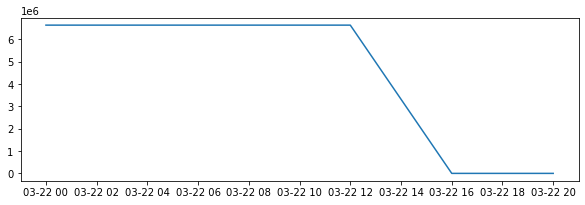

In [32]:
# plot it (59 ST on 03/22/2021)


# TAQ: 6641481(12:00) to 22(16:00)??  How to count correctly? take 22 minus 6641481? (counter = -counter )

# TAQ: how to reset the time order from 00:00 to 20:00 instead of the plot taking it from 20:00 to 00:00?
# should be 00->04->08->12->16->20

plt.figure(figsize=(10, 3))
plt.plot(mta_data[mask_59].DATE_TIME , mta_data[mask_59].ENTRIES )


### OPTIONAL : another reversed event check (57 ST-7 AV)

In [33]:
# another event check

mask_7 = ((mta_data["CA"] == "A011") &
        (mta_data["UNIT"] == "R080") & 
        (mta_data["SCP"] == "01-03-00") & 
        (mta_data["STATION"] == "57 ST-7 AV") &
        (mta_data["DATE"] == "02/28/2021"))

mta_data[mask_7].sort_values("DATE_TIME")[["DATE_TIME","ENTRIES","EXITS"]]

,DATE_TIME,ENTRIES,EXITS
1644,2021-02-28 03:00:00,885620334,489658818
1645,2021-02-28 07:00:00,885620332,489658799
1646,2021-02-28 11:00:00,885620320,489658683
1647,2021-02-28 15:00:00,885620304,489658502
1648,2021-02-28 19:00:00,885620266,489658370
1649,2021-02-28 23:00:00,885620240,489658315


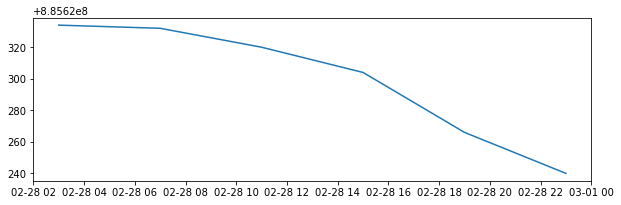

In [34]:
# plot it (57 ST _ 7AV)

plt.figure(figsize=(10, 3))
plt.plot(mta_data[mask_7].DATE_TIME , mta_data[mask_7].ENTRIES)


### It looks wrong because it shows descending. The counter is working in reverse for ENTRIES and EXITS. We need to reverse it back into the right order.

### How many stations have this reverse problem?

In [35]:
# Let's see how many stations have this problem

(mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]]
    .groupby(["CA", "UNIT", "SCP", "STATION"])
    .size())

CA    UNIT  SCP       STATION        
A002  R051  02-03-02  59 ST               1
A011  R080  01-03-00  57 ST-7 AV         76
            01-03-03  57 ST-7 AV          1
            01-03-04  57 ST-7 AV          1
A025  R023  01-06-00  34 ST-HERALD SQ     1
                                         ..
R617  R058  00-00-02  BERGEN ST           1
R622  R123  00-00-00  FRANKLIN AV        75
R624  R124  00-00-02  KINGSTON AV         1
R730  R431  00-00-04  EASTCHSTER/DYRE    76
S101  R070  00-00-04  ST. GEORGE          1
Length: 193, dtype: int64

In [36]:
mta_daily_entries = (mta_daily["ENTRIES"] - mta_daily["PREV_ENTRIES"])

In [37]:
# TQA: how?
                      #
def get_daily_counts(row, max_counter):
    
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter   # adjust for "reverse" counter
    

    if counter > max_counter:    # TAQ   
        # If counter (daily count) is > 1M, then the counter might have been reset.  
        # Set count to zero as different counters have different cycle limits
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        
        return 0
    
    return counter


_ = mta_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

entries: 238 <-- 6641395.0
entries: 3082 <-- 1390173.0
entries: 117 <-- 11715665.0
entries: 738 <-- 18398229.0
entries: 327680 <-- 756269765.0
entries: 262152 <-- 553649999.0
entries: 262152 <-- 229572623.0
entries: 0 <-- 5309746.0
entries: 80 <-- 1640812.0
entries: 101 <-- 2651127.0
entries: 104 <-- 17275602.0
entries: 262272 <-- 2255518.0
entries: 393225 <-- 7714275.0
entries: 2147432315 <-- 8421808.0
entries: 16712028 <-- 6294957.0
entries: 177 <-- 16712669.0
entries: 262144 <-- 33554713.0
entries: 24 <-- 2627860.0
entries: 106 <-- 67960951.0
entries: 232 <-- 4735529.0
entries: 147 <-- 11567738.0
entries: 135 <-- 8882903.0
entries: 1950 <-- 13809288.0
entries: 54 <-- 7903750.0
entries: 113 <-- 4454729.0
entries: 158 <-- 7643335.0
entries: 471 <-- 1377273.0
entries: 0 <-- 67108864.0
entries: 217 <-- 4780275.0
entries: 262297 <-- 1566066.0
entries: 1534984195 <-- 0.0
entries: 4 <-- 1534984197.0
entries: 67109632 <-- 1.0
entries: 23157312 <-- 1627480738.0
entries: 35 <-- 10195434.0
ent

A more involved attempt at dealing with reversed counters

In [38]:
# better version

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  
        
    if counter > max_counter:  # TAQ: why isn't if counter > max_counter ?
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        # Maybe counter was reset, so it may make sense to take the minimum
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

                                                                    # replace max_counter=1000000 
                                                                    # only take 99 percentile which is 
mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=1823)

entries: 238 <-- 6641395.0
entries: 3928737 <-- 3926909.0
entries: 3950961 <-- 3949000.0
entries: 3961219 <-- 3959321.0
entries: 3963138 <-- 3961219.0
entries: 3965000 <-- 3963138.0
entries: 3973389 <-- 3971503.0
entries: 3975361 <-- 3973389.0
entries: 3977299 <-- 3975361.0
entries: 3979173 <-- 3977299.0
entries: 3983825 <-- 3981957.0
entries: 3985718 <-- 3983825.0
entries: 3987665 <-- 3985718.0
entries: 3989694 <-- 3987665.0
entries: 3991662 <-- 3989694.0
entries: 3997869 <-- 3996036.0
entries: 3999903 <-- 3997869.0
entries: 4001985 <-- 3999903.0
entries: 4003974 <-- 4001985.0
entries: 59 <-- 154688.0
entries: 3082 <-- 1390173.0
entries: 117 <-- 11715665.0
entries: 18385269 <-- 18383418.0
entries: 18393070 <-- 18391213.0
entries: 738 <-- 18398229.0
entries: 7210 <-- 5377.0
entries: 9109 <-- 7210.0
entries: 17512 <-- 15659.0
entries: 21213 <-- 19242.0
entries: 27716 <-- 25876.0
entries: 29649 <-- 27716.0
entries: 31634 <-- 29649.0
entries: 33687 <-- 31634.0
entries: 40184 <-- 38200.0
e

entries: 23157312 <-- 1627480738.0
entries: 255 <-- 43021.0
entries: 35 <-- 10195434.0
entries: 73 <-- 375191.0
entries: 850 <-- 107019.0
entries: 2583495 <-- 2581412.0
entries: 5080346 <-- 5078520.0
entries: 5084093 <-- 5082164.0
entries: 5086025 <-- 5084093.0
entries: 5091897 <-- 5090018.0
entries: 5095565 <-- 5093681.0
entries: 5097482 <-- 5095565.0
entries: 5103316 <-- 5101490.0
entries: 5105227 <-- 5103316.0
entries: 5108851 <-- 5107025.0
entries: 5113268 <-- 5111409.0
entries: 5115229 <-- 5113268.0
entries: 5118933 <-- 5117014.0
entries: 5120891 <-- 5118933.0
entries: 5126922 <-- 5125007.0
entries: 5128803 <-- 5126922.0
entries: 5136394 <-- 5134519.0
entries: 5138342 <-- 5136394.0
entries: 5142020 <-- 5140066.0
entries: 5143994 <-- 5142020.0
entries: 5148344 <-- 5146466.0
entries: 5150198 <-- 5148344.0
entries: 5152166 <-- 5150198.0
entries: 5154125 <-- 5152166.0
entries: 5160226 <-- 5158296.0
entries: 5162220 <-- 5160226.0
entries: 5164074 <-- 5162220.0
entries: 5165982 <-- 5164

entries: 343 <-- 717682.0
entries: 266 <-- 28584.0
entries: 8 <-- 5206.0
entries: 108 <-- 14543.0
entries: 313 <-- 78468.0
entries: 74 <-- 103609.0
entries: 212 <-- 33286.0
entries: 174 <-- 16578.0
entries: 217 <-- 142169.0
entries: 259 <-- 18852.0
entries: 58 <-- 161150.0
entries: 916 <-- 399525.0
entries: 1040 <-- 22867.0
entries: 638 <-- 57209.0
entries: 495 <-- 26201.0
entries: 29 <-- 2879.0
entries: 605 <-- 59327.0
entries: 601 <-- 41896.0
entries: 457 <-- 58624.0
entries: 384 <-- 230503.0
entries: 380 <-- 49679.0
entries: 196 <-- 264944.0
entries: 203 <-- 139935.0
entries: 160 <-- 96445.0
entries: 100 <-- 142990.0
entries: 327681 <-- 1.0
entries: 2162744 <-- 1838831.0
entries: 951524 <-- 949677.0
entries: 957440 <-- 955541.0
entries: 959375 <-- 957440.0
entries: 964050 <-- 962184.0
entries: 970126 <-- 968264.0
entries: 972002 <-- 970126.0
entries: 975555 <-- 973728.0
entries: 980024 <-- 978151.0
entries: 981976 <-- 980024.0
entries: 983916 <-- 981976.0
entries: 985949 <-- 983916.

entries: 262144 <-- 786432.0
entries: 146668889 <-- 1123536132.0
entries: 1191142711 <-- 12133750.0
entries: 2297857 <-- 2295943.0
entries: 2301443 <-- 2299588.0
entries: 536886506 <-- 2125787.0
entries: 11862461 <-- 11860411.0
entries: 11895958 <-- 11894068.0
entries: 809700 <-- 807452.0
entries: 867924 <-- 865945.0
entries: 39 <-- 52160.0
entries: 4239442 <-- 4237499.0
entries: 4301916 <-- 4300090.0
entries: 4323512 <-- 4321662.0
entries: 4 <-- 65783.0
entries: 62 <-- 4183413.0
entries: 9706486 <-- 9704279.0
entries: 4115243 <-- 4113013.0
entries: 3561402 <-- 3559309.0
entries: 2353420 <-- 2351480.0
entries: 2389444 <-- 2387204.0
entries: 3791674 <-- 3789503.0
entries: 3793712 <-- 3791674.0
entries: 3795883 <-- 3793712.0
entries: 3798034 <-- 3795883.0
entries: 3800248 <-- 3798034.0
entries: 3805121 <-- 3803045.0
entries: 3807301 <-- 3805121.0
entries: 3809511 <-- 3807301.0
entries: 3811721 <-- 3809511.0
entries: 3813978 <-- 3811721.0
entries: 3815836 <-- 3813978.0
entries: 3819034 <-

entries: 262144 <-- 458752.0
entries: 78 <-- 365200.0
entries: 577 <-- 11839228.0
entries: 17945014 <-- 17943161.0
entries: 17946848 <-- 17945014.0
entries: 262151 <-- 8396.0
entries: 25 <-- 980934.0
entries: 789215 <-- 787245.0
entries: 791226 <-- 789215.0
entries: 3700118 <-- 3698031.0
entries: 3702062 <-- 3700118.0


In [39]:
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0


In [40]:
# double check 

mta_daily["DAILY_ENTRIES"].describe()
# looks fine now

count    379435.000000
mean        303.757724
std         309.108637
min           0.000000
25%          63.000000
50%         218.000000
75%         447.000000
max        1823.000000
Name: DAILY_ENTRIES, dtype: float64

### Do the same things on EXITS column

In [41]:
mta_daily_1 = (mta_data
                        .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())

mta_daily_1[["PREV_DATE", "PREV_EXITS"]] = (mta_daily_1
                                                       .groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "EXITS"]]
                                                       .shift(1))

mta_daily_1.dropna(subset= ["PREV_DATE"], axis =0, inplace = True)

mta_daily_exits = mta_daily_1["EXITS"] - mta_daily_1["PREV_EXITS"]
mta_daily_exits.describe()

count    3.794350e+05
mean    -3.454682e+03
std      6.743575e+06
min     -1.804895e+09
25%      5.800000e+01
50%      2.000000e+02
75%      4.600000e+02
max      2.005379e+09
dtype: float64

In [42]:
mta_daily_1.head()

,CA,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717,02/27/2021,2570596.0
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968,02/28/2021,2570717.0
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211,03/01/2021,2570968.0
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472,03/02/2021,2571211.0
5,A002,R051,02-00-00,59 ST,03/04/2021,2571750,03/03/2021,2571472.0


In [43]:
# remove max

round(mta_daily_exits.quantile(1))

2005379335

In [44]:
round(mta_daily_exits.quantile(0.99))

1868

In [45]:
# reverse data

def get_daily_counts_exit(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    
    if counter < 0:
        counter = -counter  
        
    if counter > max_counter:
        print(f'exits: {row["EXITS"]} <-- {row["PREV_EXITS"]}')
        counter = min(row["EXITS"], row["PREV_EXITS"])
        
    if counter > max_counter:
        return 0
    
    return counter

mta_daily_1["DAILY_EXITS"] = mta_daily_1.apply(get_daily_counts_exit, axis=1, max_counter=1868)

exits: 88 <-- 8869456.0
exits: 56 <-- 167440.0
exits: 517 <-- 995815.0
exits: 12487937 <-- 12486053.0
exits: 12494992 <-- 12493075.0
exits: 10523235 <-- 10521351.0
exits: 10545009 <-- 10543136.0
exits: 10556257 <-- 10554364.0
exits: 10567093 <-- 10565190.0
exits: 10589440 <-- 10587451.0
exits: 10600973 <-- 10598968.0
exits: 10610728 <-- 10608815.0
exits: 10612778 <-- 10610728.0
exits: 10622848 <-- 10620959.0
exits: 10624957 <-- 10622848.0
exits: 10633058 <-- 10631113.0
exits: 10635024 <-- 10633058.0
exits: 10637156 <-- 10635024.0
exits: 29817069 <-- 29814998.0
exits: 29819085 <-- 29817069.0
exits: 29821207 <-- 29819085.0
exits: 29823169 <-- 29821207.0
exits: 184 <-- 29823169.0
exits: 2940 <-- 1016.0
exits: 5065 <-- 2940.0
exits: 7182 <-- 5065.0
exits: 9384 <-- 7182.0
exits: 11576 <-- 9384.0
exits: 15600 <-- 13643.0
exits: 17614 <-- 15600.0
exits: 19708 <-- 17614.0
exits: 21785 <-- 19708.0
exits: 24022 <-- 21785.0
exits: 28355 <-- 26270.0
exits: 30485 <-- 28355.0
exits: 32616 <-- 30485.

exits: 191115 <-- 189208.0
exits: 197291 <-- 195390.0
exits: 199206 <-- 197291.0
exits: 201084 <-- 199206.0
exits: 202963 <-- 201084.0
exits: 209145 <-- 207244.0
exits: 211076 <-- 209145.0
exits: 214875 <-- 212924.0
exits: 671146416 <-- 2645604.0
exits: 24997870 <-- 24995983.0
exits: 25015444 <-- 25013528.0
exits: 25017383 <-- 25015444.0
exits: 25021223 <-- 25019246.0
exits: 25029168 <-- 25027285.0
exits: 25031100 <-- 25029168.0
exits: 25039455 <-- 25037527.0
exits: 25051720 <-- 25049834.0
exits: 25053667 <-- 25051720.0
exits: 25055570 <-- 25053667.0
exits: 25057765 <-- 25055570.0
exits: 25059865 <-- 25057765.0
exits: 25061785 <-- 25059865.0
exits: 25063897 <-- 25061785.0
exits: 25065807 <-- 25063897.0
exits: 25069421 <-- 25067541.0
exits: 25079920 <-- 25077928.0
exits: 25081860 <-- 25079920.0
exits: 25083852 <-- 25081860.0
exits: 39 <-- 2375240.0
exits: 181 <-- 440876.0
exits: 63 <-- 112339.0
exits: 134558051 <-- 134556173.0
exits: 134595751 <-- 134593842.0
exits: 134601714 <-- 134599

exits: 51 <-- 6430045.0
exits: 802756 <-- 800836.0
exits: 804822 <-- 802756.0
exits: 806898 <-- 804822.0
exits: 809008 <-- 806898.0
exits: 815996 <-- 813849.0
exits: 818204 <-- 815996.0
exits: 820483 <-- 818204.0
exits: 822852 <-- 820483.0
exits: 824746 <-- 822852.0
exits: 829966 <-- 827944.0
exits: 832016 <-- 829966.0
exits: 834046 <-- 832016.0
exits: 836312 <-- 834046.0
exits: 838380 <-- 836312.0
exits: 841899 <-- 839974.0
exits: 844033 <-- 841899.0
exits: 845928 <-- 844033.0
exits: 848252 <-- 845928.0
exits: 850851 <-- 848252.0
exits: 853845 <-- 850851.0
exits: 859489 <-- 857296.0
exits: 861533 <-- 859489.0
exits: 863675 <-- 861533.0
exits: 866054 <-- 863675.0
exits: 868162 <-- 866054.0
exits: 871674 <-- 869702.0
exits: 873868 <-- 871674.0
exits: 876271 <-- 873868.0
exits: 878718 <-- 876271.0
exits: 881385 <-- 878718.0
exits: 883645 <-- 881385.0
exits: 887121 <-- 885179.0
exits: 889372 <-- 887121.0
exits: 891618 <-- 889372.0
exits: 893845 <-- 891618.0
exits: 896445 <-- 893845.0
exit

exits: 246545 <-- 244234.0
exits: 249668 <-- 246545.0
exits: 252816 <-- 249668.0
exits: 256115 <-- 252816.0
exits: 259268 <-- 256115.0
exits: 262568 <-- 259268.0
exits: 265329 <-- 262568.0
exits: 267543 <-- 265329.0
exits: 270568 <-- 267543.0
exits: 273713 <-- 270568.0
exits: 276946 <-- 273713.0
exits: 280100 <-- 276946.0
exits: 283317 <-- 280100.0
exits: 3082076 <-- 3080182.0
exits: 10946644 <-- 10944762.0
exits: 10948553 <-- 10946644.0
exits: 10959499 <-- 10957629.0
exits: 10968421 <-- 10966551.0
exits: 379 <-- 3350287.0
exits: 364 <-- 1150163.0
exits: 9499665 <-- 9497614.0
exits: 9501762 <-- 9499665.0
exits: 9504008 <-- 9501762.0
exits: 9506219 <-- 9504008.0
exits: 9508196 <-- 9506219.0
exits: 9512415 <-- 9510351.0
exits: 9514651 <-- 9512415.0
exits: 9516784 <-- 9514651.0
exits: 9518991 <-- 9516784.0
exits: 9521207 <-- 9518991.0
exits: 9525635 <-- 9523506.0
exits: 9527801 <-- 9525635.0
exits: 9529971 <-- 9527801.0
exits: 9532033 <-- 9529971.0
exits: 9534109 <-- 9532033.0
exits: 9538

exits: 1 <-- 134237104.0
exits: 226 <-- 83693.0
exits: 13993759 <-- 13991888.0
exits: 14027783 <-- 14025844.0
exits: 14038847 <-- 14036954.0
exits: 14040800 <-- 14038847.0
exits: 14045135 <-- 14042666.0
exits: 14050454 <-- 14048467.0
exits: 14052569 <-- 14050454.0
exits: 14056383 <-- 14054365.0
exits: 14062457 <-- 14060335.0
exits: 14064679 <-- 14062457.0
exits: 14066719 <-- 14064679.0
exits: 14068790 <-- 14066719.0
exits: 14071061 <-- 14068790.0
exits: 14076512 <-- 14074358.0
exits: 14078609 <-- 14076512.0
exits: 14080619 <-- 14078609.0
exits: 14082745 <-- 14080619.0
exits: 14085036 <-- 14082745.0
exits: 14086918 <-- 14085036.0
exits: 14088974 <-- 14086918.0
exits: 14091049 <-- 14088974.0
exits: 14093207 <-- 14091049.0
exits: 14095442 <-- 14093207.0
exits: 14097679 <-- 14095442.0
exits: 14102568 <-- 14100603.0
exits: 14104863 <-- 14102568.0
exits: 14107084 <-- 14104863.0
exits: 14109367 <-- 14107084.0
exits: 14111640 <-- 14109367.0
exits: 12023503 <-- 12021569.0
exits: 12025514 <-- 12

exits: 654311428 <-- 0.0
exits: 422855 <-- 417473.0
exits: 61750 <-- 422855.0
exits: 50 <-- 60922.0
exits: 687 <-- 4830.0
exits: 498 <-- 7673.0
exits: 750 <-- 13516.0
exits: 501 <-- 4853.0
exits: 726 <-- 5102.0
exits: 813 <-- 5900.0
exits: 926 <-- 4065.0
exits: 72 <-- 16075.0
exits: 217 <-- 141980.0
exits: 273 <-- 7879.0
exits: 147 <-- 2954.0
exits: 294 <-- 2751.0
exits: 85 <-- 88349.0
exits: 143961 <-- 816584.0
exits: 139 <-- 143961.0
exits: 362 <-- 475849.0
exits: 57882 <-- 47718.0
exits: 60578 <-- 57882.0
exits: 65865 <-- 63902.0
exits: 17 <-- 474352.0
exits: 155 <-- 14166.0
exits: 126 <-- 2012.0
exits: 154 <-- 6039.0
exits: 93211 <-- 91341.0
exits: 95092 <-- 93211.0
exits: 104317 <-- 102395.0
exits: 106334 <-- 104317.0
exits: 9 <-- 23129.0
exits: 25 <-- 23729.0
exits: 937 <-- 178450.0
exits: 4 <-- 35737.0
exits: 100 <-- 17025.0
exits: 12 <-- 13550.0
exits: 60017 <-- 22758.0
exits: 22758 <-- 52643.0
exits: 0 <-- 6957.0
exits: 0 <-- 6076.0
exits: 996967 <-- 995029.0
exits: 998974 <--

exits: 1334651 <-- 1332652.0
exits: 1336693 <-- 1334651.0
exits: 1345387 <-- 1343445.0
exits: 1347274 <-- 1345387.0
exits: 1088625 <-- 1086614.0
exits: 1090710 <-- 1088625.0
exits: 1097714 <-- 1095778.0
exits: 1099676 <-- 1097714.0
exits: 152277 <-- 144887.0
exits: 241 <-- 10121717.0
exits: 1510162759 <-- 1510160866.0
exits: 1510166519 <-- 1510164567.0
exits: 1510170407 <-- 1510168432.0
exits: 1510172429 <-- 1510170407.0
exits: 1510174453 <-- 1510172429.0
exits: 1510176936 <-- 1510174453.0
exits: 1510180613 <-- 1510178631.0
exits: 1510182623 <-- 1510180613.0
exits: 1510184710 <-- 1510182623.0
exits: 1510186854 <-- 1510184710.0
exits: 1510190925 <-- 1510188834.0
exits: 1510192917 <-- 1510190925.0
exits: 1510194936 <-- 1510192917.0
exits: 1510196902 <-- 1510194936.0
exits: 1510212111 <-- 1510210145.0
exits: 1510214039 <-- 1510212111.0
exits: 1510216033 <-- 1510214039.0
exits: 1510218055 <-- 1510216033.0
exits: 1510220063 <-- 1510218055.0
exits: 1510225110 <-- 1510223039.0
exits: 15102269

exits: 74 <-- 293084.0
exits: 19942811 <-- 19940909.0
exits: 19944772 <-- 19942811.0
exits: 19952847 <-- 19950853.0
exits: 19954850 <-- 19952847.0
exits: 19956796 <-- 19954850.0
exits: 19960608 <-- 19958726.0
exits: 19965335 <-- 19963327.0
exits: 19967312 <-- 19965335.0
exits: 19971903 <-- 19970017.0
exits: 19973952 <-- 19971903.0
exits: 19975862 <-- 19973952.0
exits: 19977758 <-- 19975862.0
exits: 2180570 <-- 2178648.0
exits: 11914814 <-- 11912936.0
exits: 11945236 <-- 11943355.0
exits: 11956061 <-- 11954144.0
exits: 11957956 <-- 11956061.0
exits: 11963508 <-- 11961615.0
exits: 11965527 <-- 11963508.0
exits: 11967469 <-- 11965527.0
exits: 11969520 <-- 11967469.0
exits: 1910 <-- 11973082.0
exits: 3937 <-- 1910.0
exits: 6019 <-- 3937.0
exits: 8015 <-- 6019.0
exits: 12547 <-- 10626.0
exits: 14550 <-- 12547.0
exits: 16589 <-- 14550.0
exits: 18677 <-- 16589.0
exits: 20738 <-- 18677.0
exits: 24730 <-- 22769.0
exits: 26690 <-- 24730.0
exits: 28730 <-- 26690.0
exits: 30893 <-- 28730.0
exits: 

exits: 297770 <-- 295706.0
exits: 299740 <-- 297770.0
exits: 301910 <-- 299740.0
exits: 304038 <-- 301910.0
exits: 306242 <-- 304038.0
exits: 310773 <-- 308636.0
exits: 313095 <-- 310773.0
exits: 315252 <-- 313095.0
exits: 317217 <-- 315252.0
exits: 319230 <-- 317217.0
exits: 325134 <-- 323182.0
exits: 330726 <-- 328754.0
exits: 336790 <-- 334842.0
exits: 338712 <-- 336790.0
exits: 340742 <-- 338712.0
exits: 348832 <-- 346835.0
exits: 352631 <-- 350697.0
exits: 358698 <-- 356822.0
exits: 360712 <-- 358698.0
exits: 362698 <-- 360712.0
exits: 405574 <-- 403692.0
exits: 407446 <-- 405574.0
exits: 411219 <-- 409260.0
exits: 417396 <-- 415441.0
exits: 422796 <-- 420905.0
exits: 17316031 <-- 134318115.0
exits: 16813981 <-- 71276.0
exits: 0 <-- 131212.0
exits: 175519766 <-- 1980415076.0
exits: 1140892665 <-- 4482550.0
exits: 9529195 <-- 9527303.0
exits: 9531217 <-- 9529195.0
exits: 9533299 <-- 9531217.0
exits: 9535242 <-- 9533299.0
exits: 9537252 <-- 9535242.0
exits: 9541813 <-- 9539932.0
exi

exits: 19491998 <-- 19490110.0
exits: 19494108 <-- 19491998.0
exits: 19496255 <-- 19494108.0
exits: 19498337 <-- 19496255.0
exits: 19500283 <-- 19498337.0
exits: 19504696 <-- 19502675.0
exits: 19507018 <-- 19504696.0
exits: 19509371 <-- 19507018.0
exits: 19511622 <-- 19509371.0
exits: 19513610 <-- 19511622.0
exits: 19518030 <-- 19516151.0
exits: 19520390 <-- 19518030.0
exits: 19522753 <-- 19520390.0
exits: 19524763 <-- 19522753.0
exits: 19526954 <-- 19524763.0
exits: 19529388 <-- 19527248.0
exits: 19531794 <-- 19529388.0
exits: 19534039 <-- 19531794.0
exits: 19536405 <-- 19534039.0
exits: 19538962 <-- 19536405.0
exits: 19544010 <-- 19541748.0
exits: 19546366 <-- 19544010.0
exits: 19548689 <-- 19546366.0
exits: 19550885 <-- 19548689.0
exits: 19553193 <-- 19550885.0
exits: 19557696 <-- 19555568.0
exits: 19560050 <-- 19557696.0
exits: 19562348 <-- 19560050.0
exits: 19564738 <-- 19562348.0
exits: 19567456 <-- 19564738.0
exits: 19572956 <-- 19570535.0
exits: 19575445 <-- 19572956.0
exits: 1

In [46]:
mta_daily_1.head()

,CA,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717,02/27/2021,2570596.0,121.0
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968,02/28/2021,2570717.0,251.0
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211,03/01/2021,2570968.0,243.0
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472,03/02/2021,2571211.0,261.0
5,A002,R051,02-00-00,59 ST,03/04/2021,2571750,03/03/2021,2571472.0,278.0


In [47]:
# combine daily entries and daily exits sum and put into one df

mta_daily["DAILY_EXITS"] = mta_daily_1.DAILY_EXITS
mta_daily.shape

(379435, 10)

In [48]:
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0,121.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0,251.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0,243.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0,261.0
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0,278.0


In [49]:
mta_daily['DAILY_ACTIVITY'] = mta_daily["DAILY_ENTRIES"] + mta_daily["DAILY_EXITS"]
mta_daily.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS,DAILY_ACTIVITY
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0,121.0,384.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0,251.0,799.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0,243.0,769.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0,261.0,838.0
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0,278.0,815.0


In [50]:
mta_daily.DAILY_ACTIVITY.describe()

count    379435.000000
mean        615.966432
std         561.268179
min           0.000000
25%         180.000000
50%         481.000000
75%         901.000000
max        3592.000000
Name: DAILY_ACTIVITY, dtype: float64

In [51]:
# Unique station turnstile is CA/UNIT/STATION

# Daily activity at each station turnstile

ca_unit_station_daily = mta_daily.groupby(["CA", "UNIT", "STATION", "DATE"]) \
                       [['DAILY_ENTRIES','DAILY_EXITS','DAILY_ACTIVITY']].sum().reset_index()


ca_unit_station_daily.head()

,CA,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,DAILY_ACTIVITY
0,A002,R051,59 ST,02/28/2021,2002.0,1554.0,3556.0
1,A002,R051,59 ST,03/01/2021,4187.0,3425.0,7612.0
2,A002,R051,59 ST,03/02/2021,4459.0,3541.0,8000.0
3,A002,R051,59 ST,03/03/2021,4575.0,3808.0,8383.0
4,A002,R051,59 ST,03/04/2021,4526.0,3633.0,8159.0


In [52]:
ca_unit_station_daily.DAILY_ACTIVITY.describe()

count    56924.000000
mean      4105.811661
std       3499.670309
min          0.000000
25%       1775.000000
50%       3217.000000
75%       5348.000000
max      32834.000000
Name: DAILY_ACTIVITY, dtype: float64

In [53]:
# Daily time series for each station

station_daily = mta_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS','DAILY_ACTIVITY']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,DAILY_ACTIVITY
0,1 AV,02/28/2021,3639.0,6155.0,9794.0
1,1 AV,03/01/2021,6086.0,9311.0,15397.0
2,1 AV,03/02/2021,6254.0,9793.0,16047.0
3,1 AV,03/03/2021,6557.0,8120.0,14677.0
4,1 AV,03/04/2021,6506.0,8248.0,14754.0


In [54]:
# entries
station_totals_entries = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum().reset_index().sort_values('DAILY_ENTRIES', ascending=False)

station_totals_entries.head(20)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2373992.0
59,34 ST-HERALD SQ,2008505.0
110,86 ST,1946009.0
9,125 ST,1835317.0
46,23 ST,1715344.0
68,42 ST-PORT AUTH,1658936.0
14,14 ST-UNION SQ,1647450.0
233,GRD CNTRL-42 ST,1469198.0
85,59 ST,1450038.0
226,FULTON ST,1339086.0


In [55]:
# Station with the highest traffic within the 11-week period

station_totals = station_daily.groupby('STATION')['DAILY_ACTIVITY'].sum().reset_index().sort_values('DAILY_ACTIVITY', ascending=False)

station_totals.head(20)

,STATION,DAILY_ACTIVITY
61,34 ST-PENN STA,5305168.0
110,86 ST,3945871.0
9,125 ST,3905268.0
59,34 ST-HERALD SQ,3897824.0
46,23 ST,3602981.0
14,14 ST-UNION SQ,3588690.0
233,GRD CNTRL-42 ST,3478007.0
85,59 ST,3118997.0
226,FULTON ST,3050608.0
68,42 ST-PORT AUTH,2980230.0


(array([32., 67., 58., 50., 38., 26., 17., 14., 11., 11.,  7.,  9.,  6.,
         5.,  2.,  1.,  1.,  4.,  1.,  0.,  1.,  1.,  2.,  1.,  1.,  1.,
         0.,  1.,  2.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,  2.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  11550.  ,  117422.36,  223294.72,  329167.08,  435039.44,
         540911.8 ,  646784.16,  752656.52,  858528.88,  964401.24,
        1070273.6 , 1176145.96, 1282018.32, 1387890.68, 1493763.04,
        1599635.4 , 1705507.76, 1811380.12, 1917252.48, 2023124.84,
        2128997.2 , 2234869.56, 2340741.92, 2446614.28, 2552486.64,
        2658359.  , 2764231.36, 2870103.72, 2975976.08, 3081848.44,
        3187720.8 , 3293593.16, 3399465.52, 3505337.88, 3611210.24,
        3717082.6 , 3822954.96, 3928827.32, 4034699.68, 4140572.04,
        4246444.4 , 4352316.76, 4458189.12, 4564061.48, 4669933.84,
        4775806.2 , 4881678.56, 4987550.92, 5093423.28, 5199295.64,
        5305168.  ]),
 <BarContainer

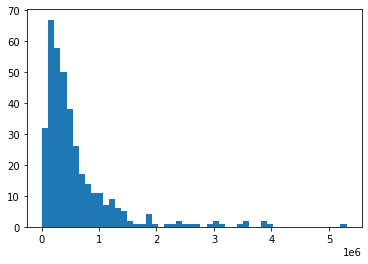

In [56]:
plt.hist(station_totals['DAILY_ACTIVITY'],50)

# MTA pair 3 : 

#  1. plot a single turnstile for one station 
### 1a. ENTRIES 

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

In [58]:
single_turnstile = mta_daily[(mta_daily["CA"] == "A002") & 
                                    (mta_daily["UNIT"] == "R051") & 
                                    (mta_daily["SCP"] == "02-00-00") & 
                                    (mta_daily["STATION"] == "59 ST")]
                

single_turnstile.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS,DAILY_ACTIVITY
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0,121.0,384.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0,251.0,799.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0,243.0,769.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0,261.0,838.0
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0,278.0,815.0


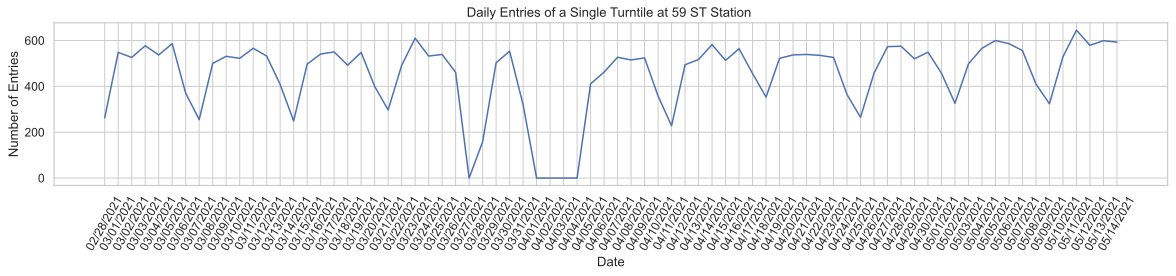

In [62]:
# plot a single turnstile at one station 

plt.figure(figsize=(20,3))
plt.plot(single_turnstile["DATE"],single_turnstile["DAILY_ENTRIES"])

plt.xlabel("Date")
plt.ylabel("Number of Entries")

plt.xticks(rotation=60)  # turn it so wont be overlapped


plt.title("Daily Entries of a Single Turntile at 59 ST Station ") # A002/R051/02-00-00 

plt.savefig("./charts/single_turnstile_59ST") #, dpi=fig.dpi, bbox_inches="tight")

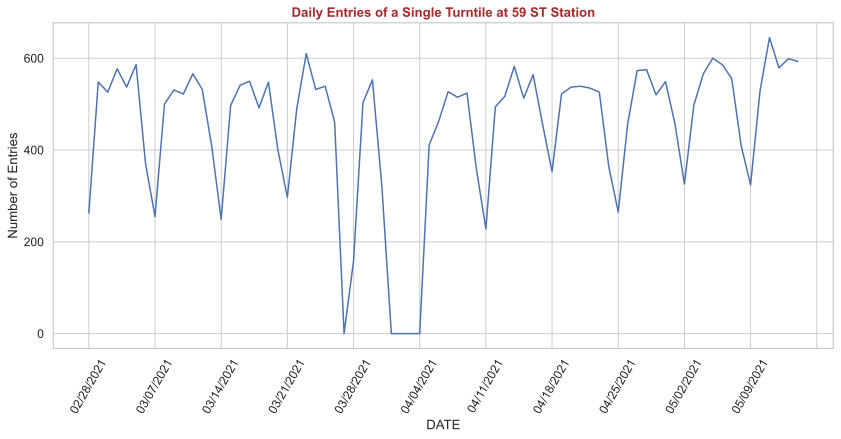

In [63]:
# make chart better - dont show too many dates

fig, ax = plt.subplots(figsize=[14,6])
ax.plot(single_turnstile["DATE"],single_turnstile["DAILY_ENTRIES"])
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_title("Daily Entries of a Single Turntile at 59 ST Station" ,weight='bold',color='brown')
ax.set_ylabel('Number of Entries')
ax.set_xlabel('DATE')
plt.xticks(rotation=60)

plt.savefig("./charts/single_turnstile_59ST_clean_2", dpi=fig.dpi, bbox_inches="tight")

In [ ]:
# ticks_x = np.linspace(0, 11, 836)
# major_dates = ["0306", "0313", "0320", "0327", "0403", "0410", "0417", "0424", "0501", "0508", "0515"]           
# plt.xticks(ticks_x, major_dates, fontsize = '20', color='orange'); #family = 'fantasy'

### Why on certain dates that has no/extremly low not moving entries?  3/27 and 4/1-4/3

In [65]:
# check original data? is it zero?
# 3/27

mask = ((mta_data["CA"] == "A002") &
        (mta_data["UNIT"] == "R051") & 
        (mta_data["SCP"] == "02-00-00") & 
        (mta_data["STATION"] == "59 ST") &
        (mta_data["DATE"] == "03/27/2021"))

mta_data[mask].head()   

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2021,20:00:00,REGULAR,7550517,2576799,2021-03-27 20:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2021,16:00:00,REGULAR,7550517,2576772,2021-03-27 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2021,12:00:00,REGULAR,7550517,2576722,2021-03-27 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2021,08:00:00,REGULAR,7550517,2576665,2021-03-27 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/27/2021,04:00:00,REGULAR,7550517,2576642,2021-03-27 04:00:00


#### Original data for 3/27 : no changes in Entries, but Exits has increased

In [66]:
# check after cleaning data? is it zero?

mask = ((mta_daily["CA"] == "A002") &
        (mta_daily["UNIT"] == "R051") & 
        (mta_daily["SCP"] == "02-00-00") & 
        (mta_daily["STATION"] == "59 ST") &
        (mta_daily["DATE"] == "03/27/2021"))

mta_daily[mask].head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS,DAILY_ACTIVITY
28,A002,R051,02-00-00,59 ST,03/27/2021,7550517,03/26/2021,7550517.0,0.0,167.0,167.0


#### Cleaned data for 3/27: shows the same thing. Zero Entries and a few Exits. 
- But at least we can make sure that the cleaning process and shifting didn't mess up the original data.
- If so, let's see why there's zero daily entries but a few exits on this case?  

In [67]:
mta_daily[mta_daily['STATION'] == "59 ST"]["DAILY_ENTRIES"].sort_values().head(50)

712       0.0
43488     0.0
43487     0.0
43486     0.0
43485     0.0
43484     0.0
43483     0.0
43482     0.0
43479     0.0
43489     0.0
43477     0.0
43475     0.0
43474     0.0
43472     0.0
43470     0.0
43468     0.0
43467     0.0
43466     0.0
43465     0.0
43476     0.0
43464     0.0
43490     0.0
43492     0.0
43509     0.0
43508     0.0
43507     0.0
43506     0.0
43505     0.0
43504     0.0
43503     0.0
43502     0.0
43491     0.0
43501     0.0
43499     0.0
43498     0.0
43497     0.0
43496     0.0
43495     0.0
266       0.0
43494     0.0
43493     0.0
43500     0.0
43463     0.0
43462     0.0
43461     0.0
43432     0.0
43430     0.0
43429     0.0
43428     0.0
303417    0.0
Name: DAILY_ENTRIES, dtype: float64

### omg so many zeros entries! 
I found there's a certian kind of cagelike subway turnstiles (look like revolving-door, ceiling-to-floor) can operate to allow passengers to go into one direction only (either enter or exit) and maybe thats why. 

- This can bambooze less experienced straphangers into paying fare twice 
- prevent some fare beaters jumping through without buying tickets.



### 1b. Daily ACTIVITY *(ENTRIES + EXITS)*

Text(0.5, 1.0, 'Daily Activity of a Single Turntile A002/R051/02-00-00 at 59 ST Station ')

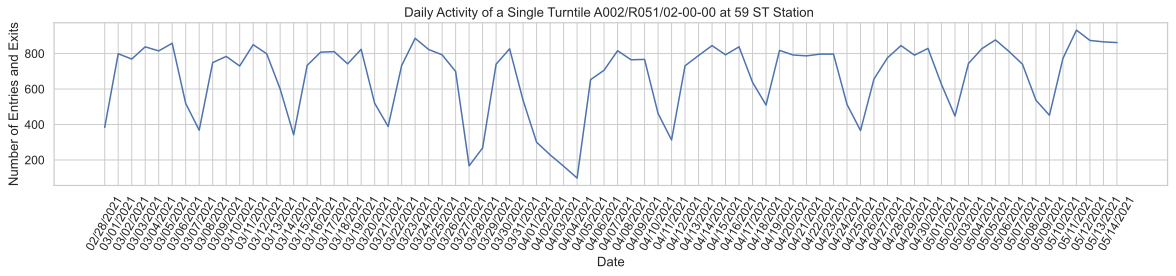

In [68]:
## plot a single turnstile daily ACTIVITY *(ENTRIES + EXITS)* for one station

plt.figure(figsize=(20,3))
plt.plot(single_turnstile["DATE"],single_turnstile["DAILY_ACTIVITY"])

plt.xlabel("Date")
plt.ylabel("Number of Entries and Exits")

plt.xticks(rotation=60)  # turn it to wont be overlapped

plt.title("Daily Activity of a Single Turntile A002/R051/02-00-00 at 59 ST Station ")

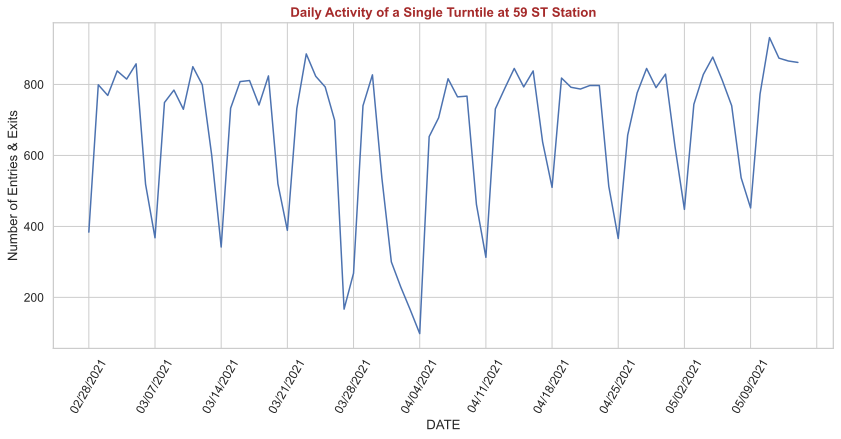

In [69]:
# better chart - dont show too man dates on x axis

fig, ax = plt.subplots(figsize=[14,6])
ax.plot(single_turnstile["DATE"],single_turnstile["DAILY_ACTIVITY"])
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_title("Daily Activity of a Single Turntile at 59 ST Station" ,weight='bold',color='brown')
ax.set_ylabel('Number of Entries & Exits')
ax.set_xlabel('DATE')
plt.xticks(rotation=60)

plt.savefig("./charts/single_turnstile_59ST_daily_act", dpi=fig.dpi, bbox_inches="tight")

# 2. plot total daily data for one station 
### 2a. ENTIRES

In [70]:
# total daily entries for one station 

station_daily_entries = mta_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_entries

,STATION,DATE,DAILY_ENTRIES
0,1 AV,02/28/2021,3639.0
1,1 AV,03/01/2021,6086.0
2,1 AV,03/02/2021,6254.0
3,1 AV,03/03/2021,6557.0
4,1 AV,03/04/2021,6506.0
...,...,...,...
28723,ZEREGA AV,05/10/2021,1103.0
28724,ZEREGA AV,05/11/2021,1181.0
28725,ZEREGA AV,05/12/2021,1157.0
28726,ZEREGA AV,05/13/2021,1078.0


In [71]:
station_59_entries =  station_daily_entries[(station_daily_entries["STATION"] == "59 ST")].copy()
station_59_entries

,STATION,DATE,DAILY_ENTRIES
6460,59 ST,02/28/2021,8642.0
6461,59 ST,03/01/2021,19765.0
6462,59 ST,03/02/2021,20712.0
6463,59 ST,03/03/2021,21779.0
6464,59 ST,03/04/2021,21203.0
...,...,...,...
6531,59 ST,05/10/2021,21555.0
6532,59 ST,05/11/2021,24485.0
6533,59 ST,05/12/2021,24422.0
6534,59 ST,05/13/2021,21749.0


Text(0.5, 1.0, 'Total Daily Entries at all 59 ST Station')

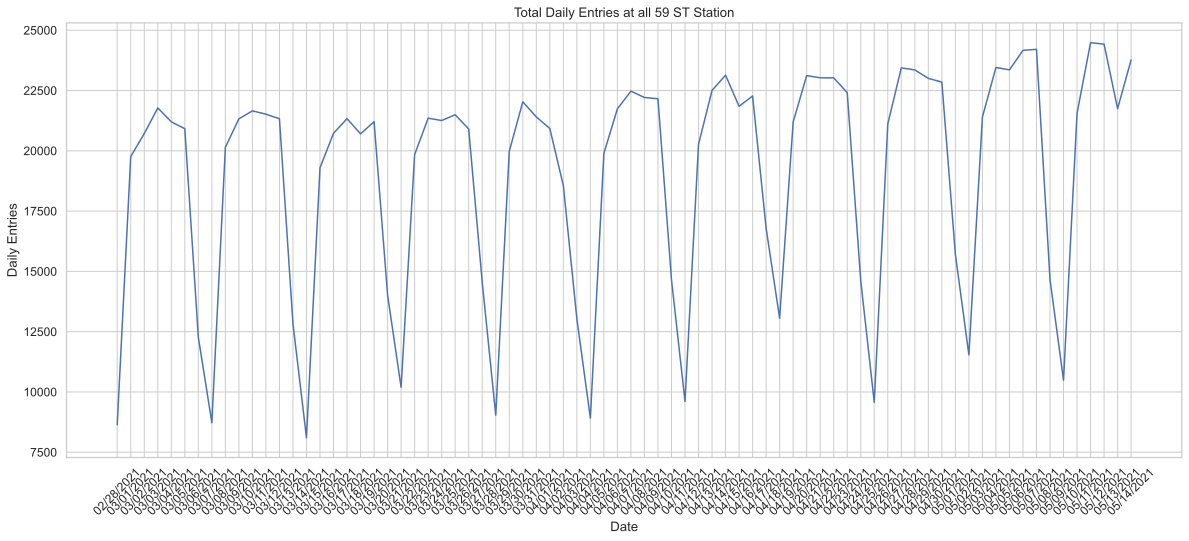

In [72]:
plt.figure(figsize=(20,8))
plt.plot(station_59_entries["DATE"], station_59_entries["DAILY_ENTRIES"])

plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Daily Entries")

plt.title("Total Daily Entries at all 59 ST Station")

Text(0.5, 0, 'DATE')

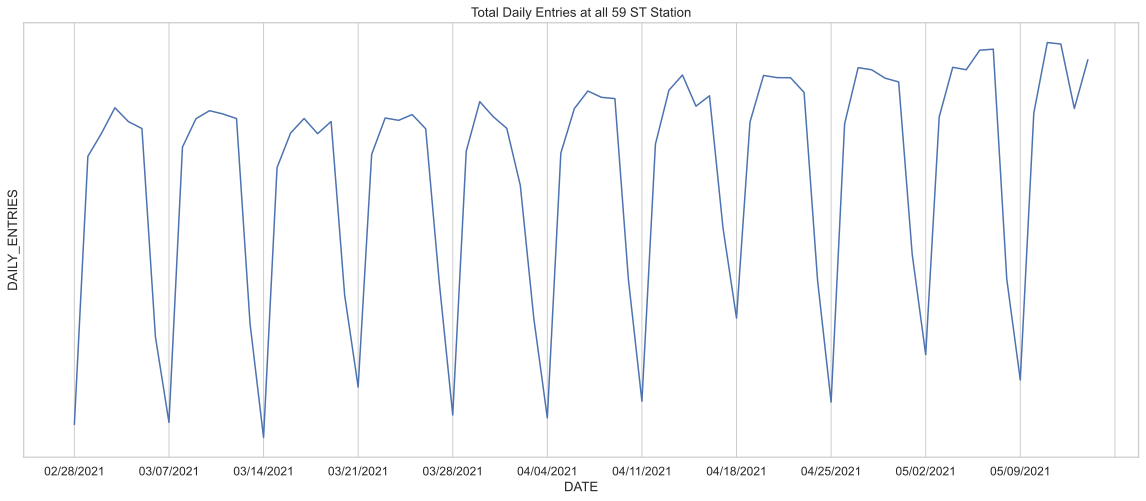

In [73]:
#  better plot (Kalu help)

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=[20,8])
ax.plot(station_59_entries["DATE"],station_59_entries["DAILY_ENTRIES"])
ax.yaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_title("Total Daily Entries at all 59 ST Station")
ax.set_ylabel('DAILY_ENTRIES')
ax.set_xlabel('DATE')



# TAQ: WHy the y ticks are misiing?
    
    
#### make it as Kalu's plot (that y has grid) 
# https://files.slack.com/files-pri/T01MF50RVGV-F022F7ZNMP1/screen_shot_2021-05-24_at_12.23.28_pm.png



# plt.grid()
#ticks_y = np.linspace(7500, 25000, 10)     
#ax.yticks(ticks_y)


### 2b. Daily ACTIVITY *(ENTRIES + EXITS)*

Text(0.5, 0, 'DATE')

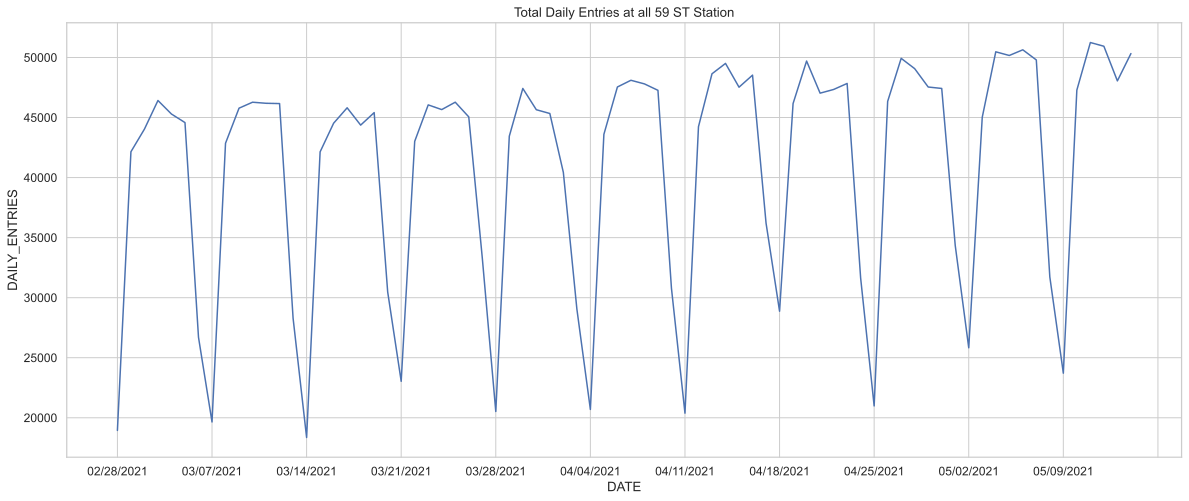

In [74]:
# plot total daily ACTIVITY for one station

station_daily = mta_daily.groupby(["STATION", "DATE"])[['DAILY_ACTIVITY']].sum().reset_index()
station_daily 


station_59 =  station_daily[(station_daily["STATION"] == "59 ST")].copy()
station_59


fig, ax = plt.subplots(figsize=[20,8])
ax.plot(station_59["DATE"],station_59["DAILY_ACTIVITY"])
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.set_title("Total Daily Entries at all 59 ST Station")
ax.set_ylabel('DAILY_ENTRIES')
ax.set_xlabel('DATE')

# 3. plot total daily data for one station by each week for the year

### 3a. ENTRIES

In [75]:
station_59_entries["DAY_OF_WEEK_NUM"] = pd.to_datetime(station_59_entries["DATE"]).dt.dayofweek
station_59_entries["WEEK_OF_YEAR"] = pd.to_datetime(station_59_entries["DATE"]).dt.isocalendar().week

In [76]:
station_59_entries.head()

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
6460,59 ST,02/28/2021,8642.0,6,8
6461,59 ST,03/01/2021,19765.0,0,9
6462,59 ST,03/02/2021,20712.0,1,9
6463,59 ST,03/03/2021,21779.0,2,9
6464,59 ST,03/04/2021,21203.0,3,9


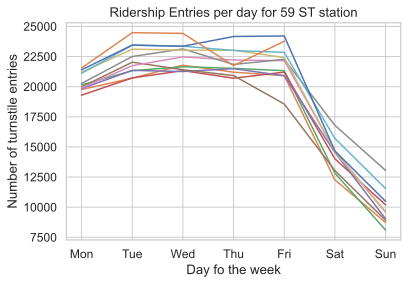

In [104]:
for i, group in station_59_entries.groupby("WEEK_OF_YEAR"):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])

    
plt.xlabel("Day fo the week")
plt.ylabel("Number of turnstile entries")

plt.xticks(np.arange(0,7),["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


plt.title('Ridership Entries per day for 59 ST station');

- Each line with different colors represents one week of riderships. We can see New Yorkers take subway on weekdays more often than weekends.

### 3b. Daily ACTIVITY *(ENTRIES + EXITS)*

In [78]:
station_59

,STATION,DATE,DAILY_ACTIVITY
6460,59 ST,02/28/2021,18950.0
6461,59 ST,03/01/2021,42151.0
6462,59 ST,03/02/2021,44037.0
6463,59 ST,03/03/2021,46418.0
6464,59 ST,03/04/2021,45290.0
...,...,...,...
6531,59 ST,05/10/2021,47284.0
6532,59 ST,05/11/2021,51245.0
6533,59 ST,05/12/2021,50936.0
6534,59 ST,05/13/2021,48052.0


In [79]:
# plot total daily ACTIVITY for one station by each week for the year


station_59["DAY_OF_WEEK_NUM"] = pd.to_datetime(station_59["DATE"]).dt.dayofweek
station_59["WEEK_OF_YEAR"] = pd.to_datetime(station_59["DATE"]).dt.isocalendar().week


In [80]:
station_59.groupby("WEEK_OF_YEAR").count()

,STATION,DATE,DAILY_ACTIVITY,DAY_OF_WEEK_NUM
WEEK_OF_YEAR,,,,
8,1,1,1,1
9,7,7,7,7
10,7,7,7,7
11,7,7,7,7
12,7,7,7,7
13,7,7,7,7
14,7,7,7,7
15,7,7,7,7
16,7,7,7,7


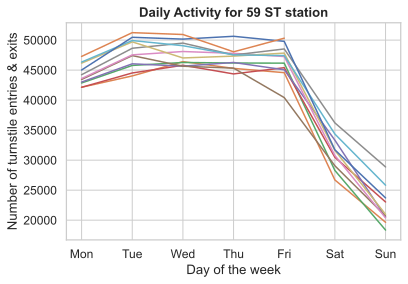

In [110]:
for i, group in station_59.groupby("WEEK_OF_YEAR"):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ACTIVITY'])

#plt.figure(figsize=(20,10)) 

plt.xlabel("Day of the week")
plt.ylabel("Number of turnstile entries & exits")

plt.xticks(np.arange(0,7),["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


plt.title('Daily Activity for 59 ST station' ,weight='bold')
plt.savefig("./Charts/Daily_59.png", dpi=fig.dpi, bbox_inches="tight")

#plt.legend(["210306", "210313", "210320", "210327", "210403", "210410", "210417", "210424", "210501", "210508", "210515"],shadow = True, loc = 0);

### This chart tells us:
  1. Each line with different colors represents one week of riderships. ( plot the line name)
  2. Weekdays are much more passengers than weekends.
  3. double down on Sat and almost triple down on Sun

# 4. Plot for a single list of the station-total ridership values (i.e., the total sum of daily data for each station, one row per station) )

## 4a. Entries

In [82]:
station_totals_entries.head(20)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2373992.0
59,34 ST-HERALD SQ,2008505.0
110,86 ST,1946009.0
9,125 ST,1835317.0
46,23 ST,1715344.0
68,42 ST-PORT AUTH,1658936.0
14,14 ST-UNION SQ,1647450.0
233,GRD CNTRL-42 ST,1469198.0
85,59 ST,1450038.0
226,FULTON ST,1339086.0


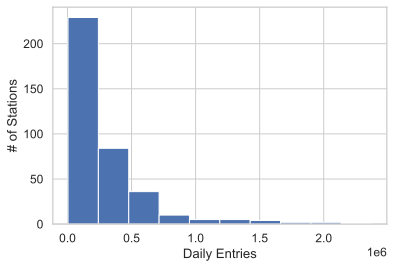

In [83]:
plt.hist(station_totals_entries['DAILY_ENTRIES']);
plt.xlabel('Daily Entries')
plt.ylabel('# of Stations');


## 4b. Daily activity (sum of ENTRIES and EXITS)

In [84]:
station_totals.head(10)

,STATION,DAILY_ACTIVITY
61,34 ST-PENN STA,5305168.0
110,86 ST,3945871.0
9,125 ST,3905268.0
59,34 ST-HERALD SQ,3897824.0
46,23 ST,3602981.0
14,14 ST-UNION SQ,3588690.0
233,GRD CNTRL-42 ST,3478007.0
85,59 ST,3118997.0
226,FULTON ST,3050608.0
68,42 ST-PORT AUTH,2980230.0


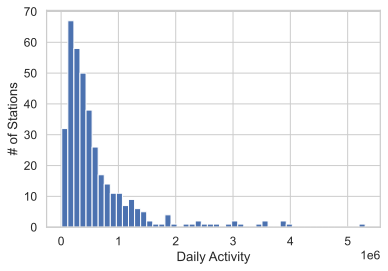

In [85]:
plt.hist(station_totals['DAILY_ACTIVITY'], 50);
plt.xlabel('Daily Activity')
plt.ylabel('# of Stations');

Compared from the last two charts, we can see the ranking of Daily Entries and Daily Activity are slightly different. 

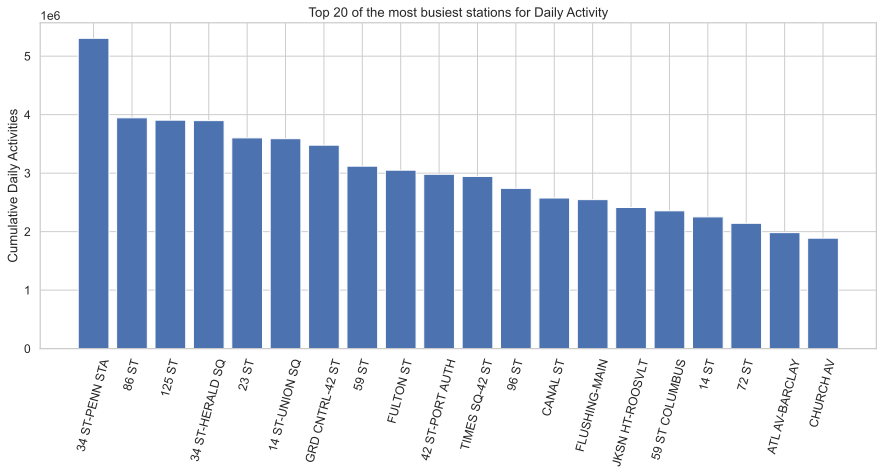

In [86]:
# Top 20 of the most busiest stations for Daily Activity

plt.figure(figsize=(15,6))
plt.title("Top 20 of the most busiest stations for Daily Activity")
plt.bar(x=station_totals['STATION'][:20], height=station_totals['DAILY_ACTIVITY'][:20])
plt.xticks(rotation=75);
plt.ylabel("Cumulative Daily Activities");


#  MVP: All stations for Daily Activity (Entires + Exits)
-  rainbow lines 
- station bar plot Top 10

# By Date

In [87]:
station_daily = mta_daily.groupby(["STATION", "DATE"])[['DAILY_ACTIVITY']].sum().reset_index()
station_daily.head()

# station_daily.groupby(["STATION"])["DATE"].head()

,STATION,DATE,DAILY_ACTIVITY
0,1 AV,02/28/2021,9794.0
1,1 AV,03/01/2021,15397.0
2,1 AV,03/02/2021,16047.0
3,1 AV,03/03/2021,14677.0
4,1 AV,03/04/2021,14754.0


In [88]:
# by date

all_date_daily = pd.pivot_table(station_daily, index = "DATE", values = "DAILY_ACTIVITY", aggfunc= np.sum)
all_date_daily

,DAILY_ACTIVITY
DATE,
02/28/2021,1612434.0
03/01/2021,3073825.0
03/02/2021,3170594.0
03/03/2021,3297136.0
03/04/2021,3268668.0
...,...
05/10/2021,3438859.0
05/11/2021,3683997.0
05/12/2021,3717230.0


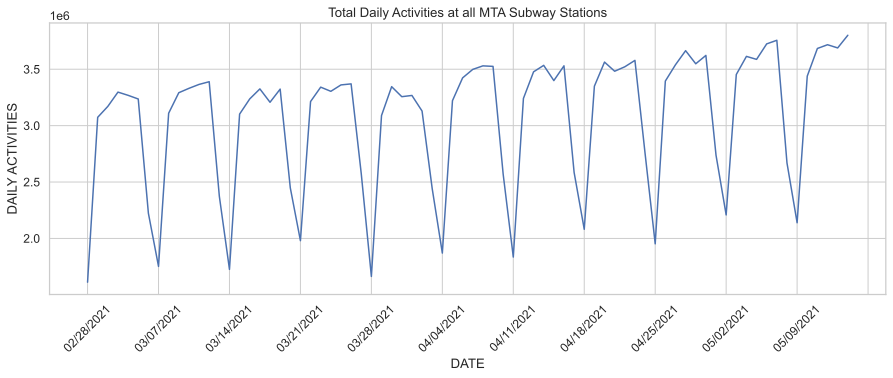

In [89]:
# Total Daily Activities at all MTA Subway Stations by date

fig, ax = plt.subplots(figsize=[15,5])  # 20,8
ax.plot(all_date_daily.index ,all_date_daily['DAILY_ACTIVITY'])
ax.yaxis.set_major_locator(ticker.MultipleLocator(500000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

plt.xticks(rotation = 45)
ax.set_title('Total Daily Activities at all MTA Subway Stations')
ax.set_ylabel('DAILY ACTIVITIES')
ax.set_xlabel('DATE')

plt.savefig("./charts/all_station", dpi=fig.dpi, bbox_inches="tight")

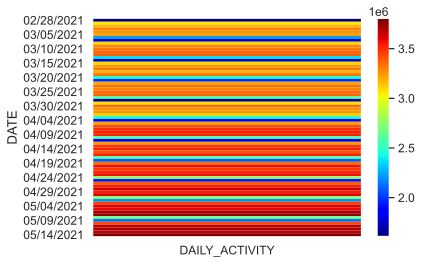

In [179]:
sns.heatmap(all_date_daily ,cmap='jet') #,annot=True);
plt.savefig("./charts/all_station_heatmap", dpi=fig.dpi, bbox_inches="tight")

# By Station 
Daily activity (sum of ENTRIES and EXITS)

In [90]:
# FIX IT # BAR FOR ONLY TOP 20 STATIONS

station_totals.head(10)

,STATION,DAILY_ACTIVITY
61,34 ST-PENN STA,5305168.0
110,86 ST,3945871.0
9,125 ST,3905268.0
59,34 ST-HERALD SQ,3897824.0
46,23 ST,3602981.0
14,14 ST-UNION SQ,3588690.0
233,GRD CNTRL-42 ST,3478007.0
85,59 ST,3118997.0
226,FULTON ST,3050608.0
68,42 ST-PORT AUTH,2980230.0


In [91]:
top_20_stations = list(station_totals["STATION"][:20])
top_20_stations

['34 ST-PENN STA',
 '86 ST',
 '125 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 '14 ST-UNION SQ',
 'GRD CNTRL-42 ST',
 '59 ST',
 'FULTON ST',
 '42 ST-PORT AUTH',
 'TIMES SQ-42 ST',
 '96 ST',
 'CANAL ST',
 'FLUSHING-MAIN',
 'JKSN HT-ROOSVLT',
 '59 ST COLUMBUS',
 '14 ST',
 '72 ST',
 'ATL AV-BARCLAY',
 'CHURCH AV']

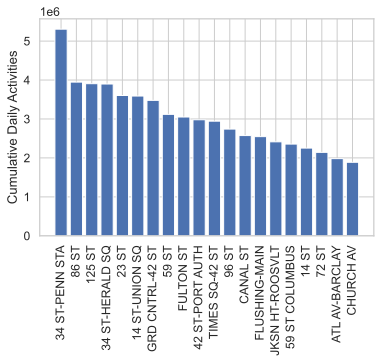

In [92]:
plt.bar(x=station_totals['STATION'][:20], height=station_totals['DAILY_ACTIVITY'][:20])
plt.xticks(rotation=90);
plt.ylabel("Cumulative Daily Activities");

In [93]:
# by Station

all_station_daily = pd.pivot_table(station_daily, index = "STATION", values = "DAILY_ACTIVITY", aggfunc= np.sum)
all_station_daily

,DAILY_ACTIVITY
STATION,
1 AV,1142191.0
103 ST,1477669.0
103 ST-CORONA,1023092.0
104 ST,222356.0
110 ST,664099.0
...,...
WOODLAWN,297753.0
WORLD TRADE CTR,363577.0
WTC-CORTLANDT,308440.0


# RAINBOW CHARTS : all stations daily activities -> sort by Mon, Tues,....Sun
- all monday rides in one point?

In [94]:
station_daily   # day of week: 0~6  # weeks of year: 8~19 

,STATION,DATE,DAILY_ACTIVITY
0,1 AV,02/28/2021,9794.0
1,1 AV,03/01/2021,15397.0
2,1 AV,03/02/2021,16047.0
3,1 AV,03/03/2021,14677.0
4,1 AV,03/04/2021,14754.0
...,...,...,...
28723,ZEREGA AV,05/10/2021,2412.0
28724,ZEREGA AV,05/11/2021,2503.0
28725,ZEREGA AV,05/12/2021,2539.0
28726,ZEREGA AV,05/13/2021,2304.0


In [95]:
station_daily["DAY_OF_WEEK_NUM"] = pd.to_datetime(station_daily["DATE"]).dt.dayofweek
station_daily["WEEK_OF_YEAR"] = pd.to_datetime(station_daily["DATE"]).dt.isocalendar().week 


In [96]:
# do .groupby("Week of year") .sum(daily activity)

all_station = station_daily.groupby(["DAY_OF_WEEK_NUM"])[["DAILY_ACTIVITY"]].sum()
all_station.reset_index(inplace = True)
all_station

,DAY_OF_WEEK_NUM,DAILY_ACTIVITY
0,0,35688332.0
1,1,37686669.0
2,2,37997704.0
3,3,37882568.0
4,4,38261686.0
5,5,25380090.0
6,6,20822174.0


# a. ALL STATION weekly

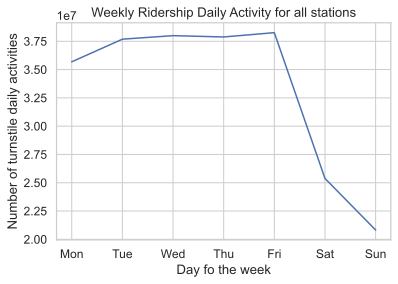

In [97]:
# ALL STATION weekly -> replace MVP Chart 1

# plt.figure(figsize=(15,8)) 

plt.plot(all_station["DAY_OF_WEEK_NUM"], all_station["DAILY_ACTIVITY"])
plt.xlabel("Day fo the week")
plt.ylabel("Number of turnstile daily activities")


plt.xticks(np.arange(0,7),["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


plt.title('Weekly Ridership Daily Activity for all stations');


plt.savefig('./charts/all station-weekly.png', dpi=fig.dpi)

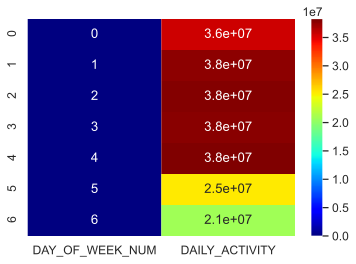

In [175]:
sns.heatmap(all_station,cmap='jet',annot=True);

# b. ALL STATION weekly average

In [98]:
all_station_2 = station_daily.groupby(["DAY_OF_WEEK_NUM"])[["DAILY_ACTIVITY"]].agg(np.mean)
all_station_2.reset_index(inplace = True)
all_station_2

,DAY_OF_WEEK_NUM,DAILY_ACTIVITY
0,0,8583.052429
1,1,9063.652958
2,2,9138.456950
3,3,9110.766715
4,4,9201.944685
5,5,6714.309524
6,6,5007.737855


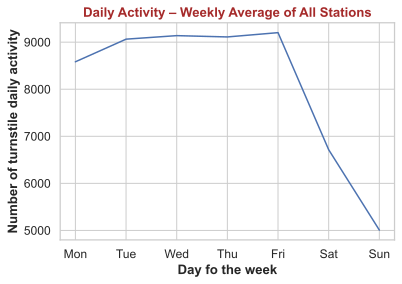

In [99]:
# ALL STATION Weekly average

#plt.figure(figsize=(15,8)) 

plt.plot(all_station_2["DAY_OF_WEEK_NUM"], all_station_2["DAILY_ACTIVITY"])
plt.xlabel("Day fo the week",weight='bold')
plt.ylabel("Number of turnstile daily activity",weight='bold')


plt.xticks(np.arange(0,7),["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Daily Activity – Weekly Average of All Stations',weight='bold',color='brown')
plt.savefig('./charts/all station-weekly average.png', dpi=fig.dpi)

# c.  ALL STATION for 11 weeks/lines-> Rainbow

In [100]:
# ALL STATION for 11 weeks -> Rainbow

all_station_1= station_daily.groupby(["WEEK_OF_YEAR", "DAY_OF_WEEK_NUM"])[["DAILY_ACTIVITY"]].sum()
all_station_1.reset_index(inplace = True)
all_station_1

,WEEK_OF_YEAR,DAY_OF_WEEK_NUM,DAILY_ACTIVITY
0,8,6,1612434.0
1,9,0,3073825.0
2,9,1,3170594.0
3,9,2,3297136.0
4,9,3,3268668.0
...,...,...,...
71,19,0,3438859.0
72,19,1,3683997.0
73,19,2,3717230.0
74,19,3,3688775.0


In [111]:
# rainbow 1   #Try: worked with IAN (need to fix) # comeback later

#for i, group in station_daily.groupby(["WEEK_OF_YEAR", "DAY_OF_WEEK_NUM"]):
    #plt.plot(group['WEEK_OF_YEAR'], group['DAILY_ACTIVITY'])


# plt.figure(figsize=(20,8))    

#plt.xlabel("Day fo the week")
#plt.ylabel("Number of turnstile daily activities")

#plt.xticks(np.arange(0,7),["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


#plt.title('Ridership Daily Activity (Entries+Exits) per day for all stations');

In [ ]:
# rainbow 2 # Not working

#for i, group in station_daily.groupby("WEEK_OF_YEAR"):
    #plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ACTIVITY'])


# plt.figure(figsize=(20,8))    
#plt.xlabel("Day fo the week")
#plt.ylabel("Number of turnstile daily activities")

#plt.xticks(np.arange(0,7),["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


#plt.title('Ridership Daily Activity (Entries+Exits) per day for all stations');

# d. Filter the stations by Tech firms map

# Find outsource data to filter 

List of tech companies in the New York metropolitan area


In [113]:
# SQL terminal code

#CREATE TABLE station_totals_zipcode (
   #...> STATION TEXT,
   #...> DAILY_ACTIVITY INTEGER,
   #...> ZIPCODE INTEGER,
   #...> PRIMARY KEY (STATION)
   #...> );

In [114]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///zipcode.db")
station_zipcode = pd.read_sql('SELECT * FROM station_totals_zipcode;', engine)

In [115]:
station_zipcode.to_csv('station_totals_zipcode.csv') #, header = True , index = True)
# or  pd.read_csv('station_totals_zipcode.csv' , header = 0)    #, index_col = 0)

station_zipcode.drop(station_zipcode.index[0], inplace = True)   #TAQ
del station_zipcode["DAILY_ACTIVITY"] 
station_zipcode

,STATION,ZIPCODE
1,34 ST-PENN STA,10001
2,86 ST,10028
3,34 ST-HERALD SQ,10001
4,125 ST,10027
5,23 ST,10010
...,...,...
374,ROCKAWAY PARK B,11694
375,BEACH 98 ST,11694
376,TOMPKINSVILLE,10301
377,BEACH 105 ST,11694


In [116]:
#Lower_Manhattan_Google =[10004, 10005, 10006, 10007, 10038, 10280, 10012, 10013, 10014]

Lower_Manhattan_Zipcodes =[10019, 10022,10036, 10017, 10018, 10016, 10001, 10010, 10011, 
                           10003, 10009, 10014, 10012,10002, 10013, 10002, 10007, 10048, 
                           10006, 10038, 10005, 10004]                     
                           
  
Lower_Manhattan = pd.DataFrame(Lower_Manhattan_Zipcodes)
Lower_Manhattan.columns =["ZIPCODE"]


# Filter the station zipcode list by Lower Manhattan zipcodes

In [117]:
station_zipcode_LM = pd.merge(station_zipcode, Lower_Manhattan, on="ZIPCODE", how='inner')
station_zipcode_LM

,STATION,ZIPCODE
0,34 ST-PENN STA,10001
1,34 ST-HERALD SQ,10001
2,34 ST-HUDSON YD,10001
3,23 ST,10010
4,TWENTY THIRD ST,10010
...,...,...
63,BOWLING GREEN,10004
64,WHITEHALL S-FRY,10004
65,SOUTH FERRY,10004
66,CITY / BUS,10018


# Filter the df above with Daily Activity station ranking 

In [118]:
station_totals

,STATION,DAILY_ACTIVITY
61,34 ST-PENN STA,5305168.0
110,86 ST,3945871.0
9,125 ST,3905268.0
59,34 ST-HERALD SQ,3897824.0
46,23 ST,3602981.0
...,...,...
332,ROCKAWAY PARK B,46011.0
148,BEACH 98 ST,21984.0
353,TOMPKINSVILLE,19306.0
141,BEACH 105 ST,12053.0


In [119]:
station_totals.dtypes

STATION            object
DAILY_ACTIVITY    float64
dtype: object

In [120]:
station_zipcode_LM.dtypes

STATION    object
ZIPCODE    object
dtype: object

In [121]:
result = pd.merge(station_totals, station_zipcode_LM, on=['STATION'])
result

,STATION,DAILY_ACTIVITY,ZIPCODE
0,34 ST-PENN STA,5305168.0,10001
1,34 ST-HERALD SQ,3897824.0,10001
2,23 ST,3602981.0,10010
3,14 ST-UNION SQ,3588690.0,10003
4,GRD CNTRL-42 ST,3478007.0,10017
...,...,...,...
63,PARK PLACE,176759.0,10007
64,BROAD ST,158937.0,10005
65,RIT-MANHATTAN,142399.0,10003
66,CITY HALL,136576.0,10007


In [122]:
refined_top_20_stations = list(result["STATION"][:20])
refined_top_20_stations

['34 ST-PENN STA',
 '34 ST-HERALD SQ',
 '23 ST',
 '14 ST-UNION SQ',
 'GRD CNTRL-42 ST',
 'FULTON ST',
 '42 ST-PORT AUTH',
 'TIMES SQ-42 ST',
 'CANAL ST',
 '14 ST',
 'PATH NEW WTC',
 '28 ST',
 'CHAMBERS ST',
 '8 AV',
 'GRAND ST',
 'GRAND ST',
 '50 ST',
 '7 AV',
 'W 4 ST-WASH SQ',
 'LEXINGTON AV/53']

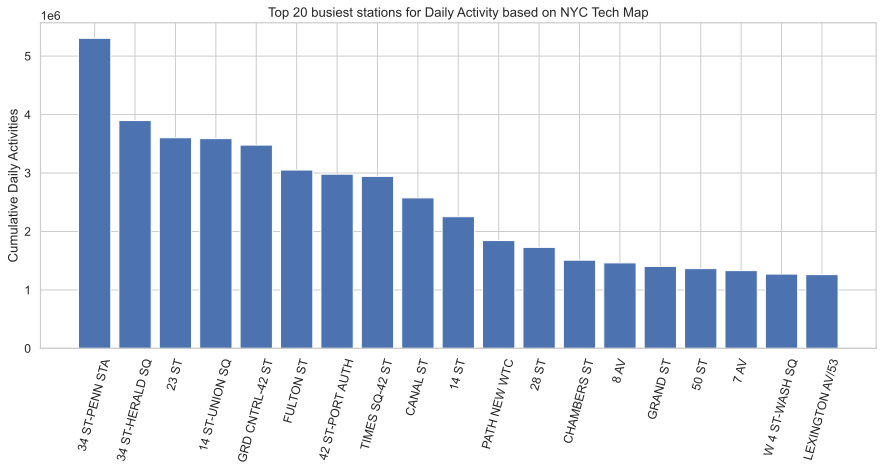

In [123]:
# Top 20 busiest stations for Daily Activity based on NYC Tech Map
# Make Station Ranking Chart ( Lower Manhattan only )


plt.figure(figsize=(15,6))
plt.title("Top 20 busiest stations for Daily Activity based on NYC Tech Map")
plt.bar(x=result['STATION'][:20], height=result['DAILY_ACTIVITY'][:20])
plt.xticks(rotation=75);
plt.ylabel("Cumulative Daily Activities")
           
plt.savefig("./charts/Top20_tech.png",dpi=fig.dpi, bbox_inches='tight')

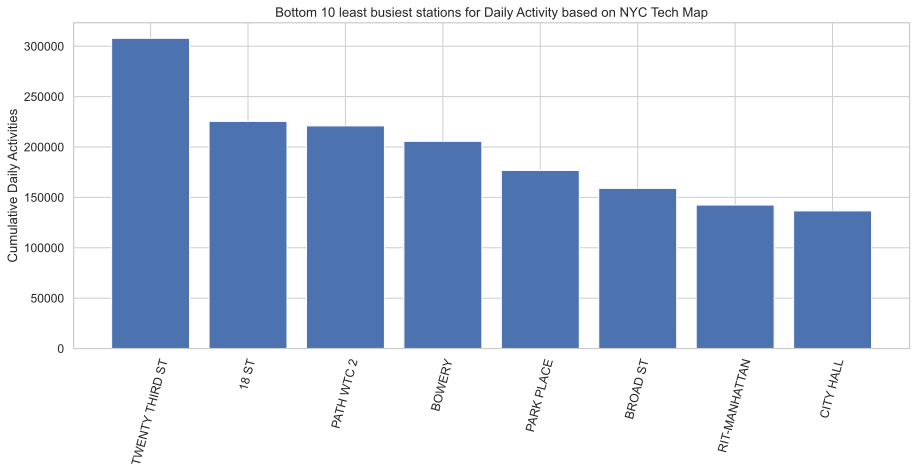

In [124]:
# Bottom 20 least busiest stations for Daily Activity based on NYC Tech Map


plt.figure(figsize=(15,6))
plt.title("Bottom 10 least busiest stations for Daily Activity based on NYC Tech Map")
plt.bar(x=result['STATION'][-10:-1], height=result['DAILY_ACTIVITY'][-10:-1])
plt.xticks(rotation=75);
plt.ylabel("Cumulative Daily Activities")
           
plt.savefig("./charts/bottom20_tech_.png",dpi=fig.dpi, bbox_inches='tight')

In [125]:
# or use SQL : Left join 

# step1: get station_zipcode_LM. into SQL db

# step2: SELECT * FROM station_zipcode_LM m LEFT JOIN station_totals s  ON m.STATION = s.STATION

# 34ST PENN is the best station. And Fridays have the most riders. 
# Let's check what time is the best hours?

# ideas

In [126]:
# 1. sort HOUR_ENTRIES (use shift)
# 2. take only Friday ( # Friday only : Series.dt.dayofweek = 4)

# every fridays
# 6 time periods per day


# 3. 
# x: 00-04, 04-08, 08-12...... 
# y: average amount of daily activity across all fridays on 34 st stations


In [127]:
# look into STATION 34ST PENN only

mask = (mta_data["STATION"] == "34 ST-PENN STA")


mta_34Penn = mta_data[mask]
mta_34Penn # DATE_TIME is descending tho

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
140240,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,05/14/2021,22:00:00,REGULAR,68072756,18760512,2021-05-14 22:00:00
140239,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,05/14/2021,18:00:00,REGULAR,68072719,18760454,2021-05-14 18:00:00
140238,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,05/14/2021,14:00:00,REGULAR,68072666,18760378,2021-05-14 14:00:00
140237,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,05/14/2021,10:00:00,REGULAR,68072612,18760271,2021-05-14 10:00:00
140236,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,05/14/2021,06:00:00,REGULAR,68072596,18760182,2021-05-14 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
55103,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2021,19:00:00,REGULAR,233493,710006,2021-02-27 19:00:00
55102,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2021,15:00:00,REGULAR,233445,709956,2021-02-27 15:00:00
55101,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2021,11:00:00,REGULAR,233392,709913,2021-02-27 11:00:00
55100,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2021,07:00:00,REGULAR,233375,709858,2021-02-27 07:00:00


# HOURLY ENTRIES &  HOURLY ENTRIES

In [128]:
# 0 TRY : need to create the .shift(1) by hour for EVERY turnstile

mta_34_hourly = (mta_34Penn     
                    .groupby(["CA", "UNIT", "SCP", "DATE_TIME"],as_index=False)
                     [["ENTRIES","EXITS"]].first())  
                                                                                     #[["TIME", "ENTRIES","EXITS"]])


                                                        
mta_34_hourly.head()

,CA,UNIT,SCP,DATE_TIME,ENTRIES,EXITS
0,N067,R012,00-00-00,2021-02-27 03:00:00,233373,709846
1,N067,R012,00-00-00,2021-02-27 07:00:00,233375,709858
2,N067,R012,00-00-00,2021-02-27 11:00:00,233392,709913
3,N067,R012,00-00-00,2021-02-27 15:00:00,233445,709956
4,N067,R012,00-00-00,2021-02-27 19:00:00,233493,710006


In [129]:
mta_34_hourly[["PREV_DATE_TIME", "PREV_ENTRIES", "PREV_EXITS"]] = mta_34_hourly.groupby(["CA", "UNIT", "SCP"])[["DATE_TIME", "ENTRIES", "EXITS"]].shift(1)

  

mta_34_hourly.head()

,CA,UNIT,SCP,DATE_TIME,ENTRIES,EXITS,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXITS
0,N067,R012,00-00-00,2021-02-27 03:00:00,233373,709846,NaT,NaN,NaN
1,N067,R012,00-00-00,2021-02-27 07:00:00,233375,709858,2021-02-27 03:00:00,233373.0,709846.0
2,N067,R012,00-00-00,2021-02-27 11:00:00,233392,709913,2021-02-27 07:00:00,233375.0,709858.0
3,N067,R012,00-00-00,2021-02-27 15:00:00,233445,709956,2021-02-27 11:00:00,233392.0,709913.0
4,N067,R012,00-00-00,2021-02-27 19:00:00,233493,710006,2021-02-27 15:00:00,233445.0,709956.0


In [130]:
# Drop the rows for the earliest date (NaN)

mta_34_hourly.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)

In [131]:
mta_34_hourly_entries = (mta_34_hourly["ENTRIES"] - mta_34_hourly["PREV_ENTRIES"])
mta_34_hourly_entries.describe()

count    4.707300e+04
mean     4.759376e+01
std      1.004380e+05
min     -9.417776e+06
25%      5.000000e+00
50%      2.800000e+01
75%      7.200000e+01
max      9.417785e+06
dtype: float64

In [132]:
mta_34_hourly_exits = (mta_34_hourly["EXITS"] - mta_34_hourly["PREV_EXITS"])
mta_34_hourly_exits.describe()

count    4.707300e+04
mean     6.497172e+01
std      1.568852e+05
min     -1.715471e+07
25%      9.000000e+00
50%      3.500000e+01
75%      8.800000e+01
max      1.715505e+07
dtype: float64

In [133]:
# take out outlier
print(f'99th Percentile daily Entries = { round(mta_34_hourly_entries.quantile(0.99))}')
print(f'99th Percentile daily Exits = { round(mta_34_hourly_exits.quantile(0.99))}')

99th Percentile daily Entries = 322
99th Percentile daily Exits = 508


In [134]:
# check how many backwards row for ENTRIES?
mta_34_hourly[mta_34_hourly["ENTRIES"] < mta_34_hourly["PREV_ENTRIES"]].shape 

(459, 9)

In [135]:
(mta_34_hourly[mta_34_hourly["ENTRIES"] < mta_34_hourly["PREV_ENTRIES"]]
    .groupby(["CA", "UNIT", "SCP"])
    .size())

CA    UNIT  SCP     
N067  R012  00-06-00      1
N071  R013  00-00-00      1
            00-00-01      1
            00-00-02      1
            00-00-03      1
            00-00-04      1
            00-06-00      1
R138  R293  00-03-00    451
            00-03-03      1
dtype: int64

In [136]:
# check how many backwards row for EXITS?

mta_34_hourly[mta_34_hourly["EXITS"] < mta_34_hourly["PREV_EXITS"]].shape 

(464, 9)

In [137]:
(mta_34_hourly[mta_34_hourly["EXITS"] < mta_34_hourly["PREV_EXITS"]]
    .groupby(["CA", "UNIT", "SCP"])
    .size())

CA    UNIT  SCP     
N071  R013  00-00-00      1
            00-00-01      1
            00-00-02      1
            00-00-03      1
            00-00-04      1
            00-06-00      1
R138  R293  00-03-00    456
            00-03-03      1
            00-05-01      1
dtype: int64

In [138]:
def get_hourly_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  
        
    if counter > max_counter:  # TAQ: why isn't if counter > max_counter ?
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        # Maybe counter was reset, so it may make sense to take the minimum
        
    if counter > max_counter:
        
        return 0
    
    return counter

                                                                    
                                                                    # only take 99 percentile which is 
mta_34_hourly["HOURLY_ENTRIES"] = mta_34_hourly.apply(get_hourly_counts, axis=1, max_counter=322)

entries: 1656647 <-- 1656296.0
entries: 1065805 <-- 1065480.0
entries: 262147 <-- 655689.0
entries: 10508098 <-- 10507772.0
entries: 10508714 <-- 10508363.0
entries: 10509319 <-- 10508987.0
entries: 10512561 <-- 10512205.0
entries: 10515869 <-- 10515525.0
entries: 10518444 <-- 10518118.0
entries: 10524542 <-- 10524198.0
entries: 10526414 <-- 10526084.0
entries: 10528038 <-- 10527712.0
entries: 10529316 <-- 10528980.0
entries: 10529967 <-- 10529633.0
entries: 10533130 <-- 10532616.0
entries: 10535374 <-- 10535039.0
entries: 10536009 <-- 10535649.0
entries: 10536648 <-- 10536319.0
entries: 10537303 <-- 10536965.0
entries: 10538922 <-- 10538589.0
entries: 10539543 <-- 10539199.0
entries: 10540195 <-- 10539855.0
entries: 10540831 <-- 10540498.0
entries: 8885801 <-- 8885444.0
entries: 8886535 <-- 8886178.0
entries: 8887266 <-- 8886918.0
entries: 8889166 <-- 8888820.0
entries: 8889879 <-- 8889510.0
entries: 8890601 <-- 8890257.0
entries: 8891296 <-- 8890952.0
entries: 8893217 <-- 8892891.0
e

In [139]:
def get_hourly_counts_exit(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    
    if counter < 0:
        counter = -counter  
        
    if counter > max_counter: 
        print(f'exits: {row["EXITS"]} <-- {row["PREV_EXITS"]}')
        counter = min(row["EXITS"], row["PREV_EXITS"])
        # Maybe counter was reset, so it may make sense to take the minimum
        
    if counter > max_counter:
        
        return 0
    
    return counter

                                                                    
                                                                    # only take 99 percentile which is 
mta_34_hourly["HOURLY_EXITS"] = mta_34_hourly.apply(get_hourly_counts_exit, axis=1, max_counter=508)

exits: 1012921 <-- 1012359.0
exits: 3491802 <-- 3491094.0
exits: 3493755 <-- 3492942.0
exits: 3495774 <-- 3494951.0
exits: 3497847 <-- 3496978.0
exits: 3500118 <-- 3499146.0
exits: 3504967 <-- 3504189.0
exits: 3506867 <-- 3506108.0
exits: 3508946 <-- 3508111.0
exits: 3510876 <-- 3510050.0
exits: 3512163 <-- 3511653.0
exits: 3513090 <-- 3512163.0
exits: 3517505 <-- 3516959.0
exits: 3518175 <-- 3517505.0
exits: 3519485 <-- 3518892.0
exits: 3520190 <-- 3519485.0
exits: 3521532 <-- 3520945.0
exits: 3522448 <-- 3521532.0
exits: 3523568 <-- 3522969.0
exits: 3524339 <-- 3523568.0
exits: 3525797 <-- 3525134.0
exits: 3526677 <-- 3525797.0
exits: 3531212 <-- 3530456.0
exits: 3531929 <-- 3531212.0
exits: 3533269 <-- 3532712.0
exits: 3533984 <-- 3533269.0
exits: 3535285 <-- 3534727.0
exits: 3536061 <-- 3535285.0
exits: 3537428 <-- 3536815.0
exits: 3538156 <-- 3537428.0
exits: 3539788 <-- 3538962.0
exits: 3540713 <-- 3539788.0
exits: 3542354 <-- 3541692.0
exits: 3543020 <-- 3542354.0
exits: 3545854

In [140]:
mta_34_hourly.head() 

,CA,UNIT,SCP,DATE_TIME,ENTRIES,EXITS,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS
1,N067,R012,00-00-00,2021-02-27 07:00:00,233375,709858,2021-02-27 03:00:00,233373.0,709846.0,2.0,12.0
2,N067,R012,00-00-00,2021-02-27 11:00:00,233392,709913,2021-02-27 07:00:00,233375.0,709858.0,17.0,55.0
3,N067,R012,00-00-00,2021-02-27 15:00:00,233445,709956,2021-02-27 11:00:00,233392.0,709913.0,53.0,43.0
4,N067,R012,00-00-00,2021-02-27 19:00:00,233493,710006,2021-02-27 15:00:00,233445.0,709956.0,48.0,50.0
5,N067,R012,00-00-00,2021-02-27 23:00:00,233504,710027,2021-02-27 19:00:00,233493.0,710006.0,11.0,21.0


In [141]:
mta_34_hourly['HOURLY_ACTIVITY'] = mta_34_hourly["HOURLY_ENTRIES"] + mta_34_hourly["HOURLY_EXITS"]
mta_34_hourly.head()

,CA,UNIT,SCP,DATE_TIME,ENTRIES,EXITS,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,HOURLY_ACTIVITY
1,N067,R012,00-00-00,2021-02-27 07:00:00,233375,709858,2021-02-27 03:00:00,233373.0,709846.0,2.0,12.0,14.0
2,N067,R012,00-00-00,2021-02-27 11:00:00,233392,709913,2021-02-27 07:00:00,233375.0,709858.0,17.0,55.0,72.0
3,N067,R012,00-00-00,2021-02-27 15:00:00,233445,709956,2021-02-27 11:00:00,233392.0,709913.0,53.0,43.0,96.0
4,N067,R012,00-00-00,2021-02-27 19:00:00,233493,710006,2021-02-27 15:00:00,233445.0,709956.0,48.0,50.0,98.0
5,N067,R012,00-00-00,2021-02-27 23:00:00,233504,710027,2021-02-27 19:00:00,233493.0,710006.0,11.0,21.0,32.0


In [142]:
mta_34_hourly["DAY_OF_WEEK_NUM"] = pd.to_datetime(mta_34_hourly["DATE_TIME"]).dt.dayofweek

#mask  =  (mta_34_hourly["DAY_OF_WEEK_NUM"]) # Friday  # change other dyas
#mta_34_hourly_Fri = mta_34_hourly[mask]

mta_34_hourly.head()

,CA,UNIT,SCP,DATE_TIME,ENTRIES,EXITS,PREV_DATE_TIME,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,HOURLY_ACTIVITY,DAY_OF_WEEK_NUM
1,N067,R012,00-00-00,2021-02-27 07:00:00,233375,709858,2021-02-27 03:00:00,233373.0,709846.0,2.0,12.0,14.0,5
2,N067,R012,00-00-00,2021-02-27 11:00:00,233392,709913,2021-02-27 07:00:00,233375.0,709858.0,17.0,55.0,72.0,5
3,N067,R012,00-00-00,2021-02-27 15:00:00,233445,709956,2021-02-27 11:00:00,233392.0,709913.0,53.0,43.0,96.0,5
4,N067,R012,00-00-00,2021-02-27 19:00:00,233493,710006,2021-02-27 15:00:00,233445.0,709956.0,48.0,50.0,98.0,5
5,N067,R012,00-00-00,2021-02-27 23:00:00,233504,710027,2021-02-27 19:00:00,233493.0,710006.0,11.0,21.0,32.0,5


In [143]:
mta_34_hourly.groupby(["DATE_TIME"]).HOURLY_ACTIVITY.mean()

DATE_TIME
2021-02-27 05:00:00      7.000000
2021-02-27 07:00:00     22.259740
2021-02-27 09:00:00     69.680000
2021-02-27 11:00:00     76.051948
2021-02-27 13:00:00    118.200000
                          ...    
2021-05-14 14:00:00    208.750000
2021-05-14 16:00:00    219.844156
2021-05-14 18:00:00    327.304348
2021-05-14 20:00:00    201.272727
2021-05-14 22:00:00    219.880000
Name: HOURLY_ACTIVITY, Length: 951, dtype: float64

In [182]:
mta_34_hourly.groupby("DAY_OF_WEEK_NUM").mean()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,HOURLY_ACTIVITY,HOUR_OF_DAY
DAY_OF_WEEK_NUM,,,,,,,,
0,4.632049e+07,5.045622e+07,4.632043e+07,5.045615e+07,51.759851,66.130558,117.890409,10.860520
1,4.641036e+07,5.056985e+07,4.641031e+07,5.056977e+07,53.289997,67.657762,120.947759,10.839863
2,4.651922e+07,5.067508e+07,4.651916e+07,5.067501e+07,53.043427,67.705235,120.748662,10.828079
3,4.675430e+07,5.112795e+07,4.675424e+07,5.112787e+07,52.442561,67.541793,119.984355,10.863248
4,4.647436e+07,5.062133e+07,4.647432e+07,5.062125e+07,54.793824,71.267492,126.061316,10.848277
5,4.648495e+07,5.072284e+07,4.648491e+07,5.072278e+07,37.139328,54.954662,92.093990,11.164633
6,4.661912e+07,5.032165e+07,4.661909e+07,5.032163e+07,30.024243,43.445565,73.469809,10.985243


In [183]:
# day_of_week -> groupby

# FRIDAY IS THE BUSIEST! DOUBLE CONFIRMED

mta_34_friday = mta_34_hourly.groupby("DAY_OF_WEEK_NUM")[["HOURLY_ACTIVITY"]].mean()
mta_34_friday

,HOURLY_ACTIVITY
DAY_OF_WEEK_NUM,
0,117.890409
1,120.947759
2,120.748662
3,119.984355
4,126.061316
5,92.093990
6,73.469809


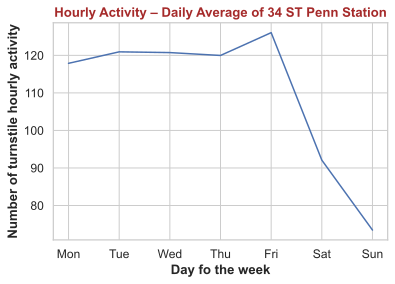

In [186]:
plt.plot(mta_34_friday.index, mta_34_friday["HOURLY_ACTIVITY"])
plt.xlabel("Day fo the week",weight='bold')
plt.ylabel("Number of turnstile hourly activity",weight='bold')


plt.xticks(np.arange(0,7),["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Hourly Activity – Daily Average of 34 ST Penn Station',weight='bold',color='brown')
plt.savefig('./charts/mta_34_friday.png', dpi=fig.dpi)

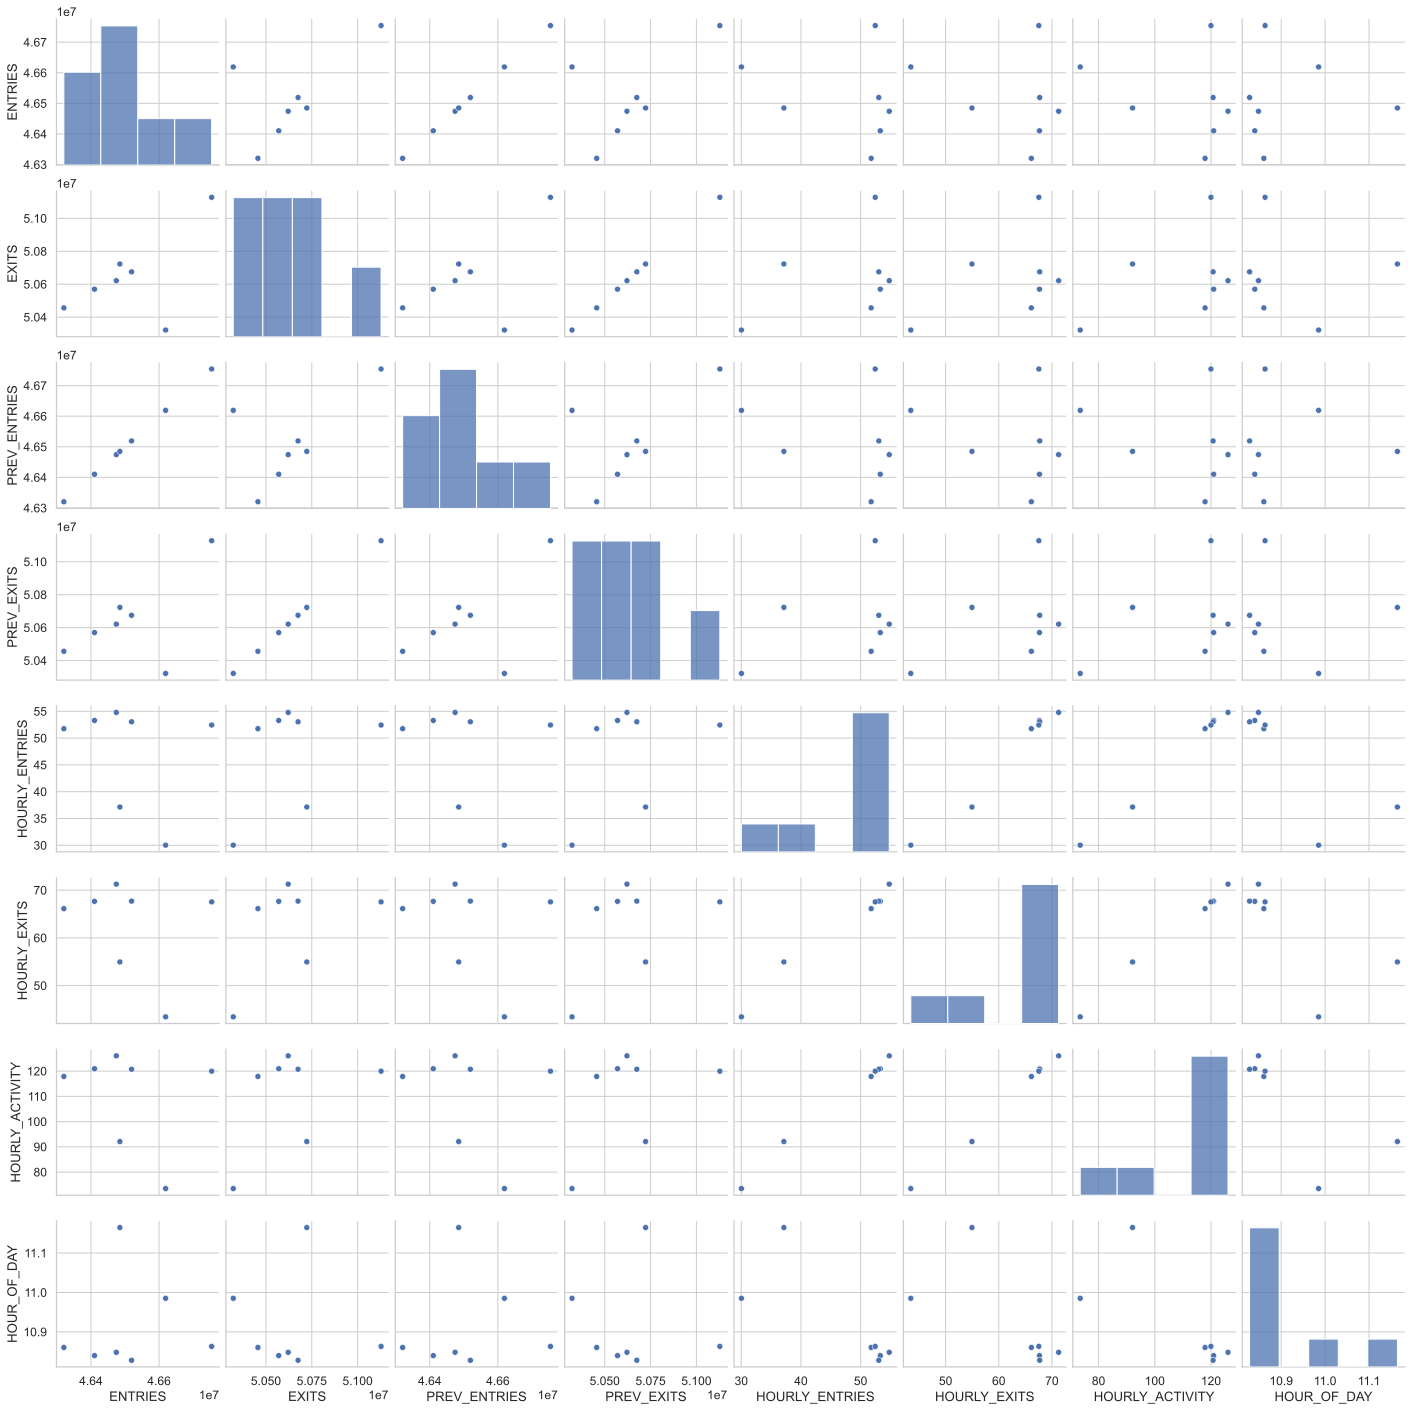

In [160]:
sns.pairplot(mta_34_friday)

<AxesSubplot:xlabel='DAY_OF_WEEK_NUM', ylabel='HOURLY_ACTIVITY'>

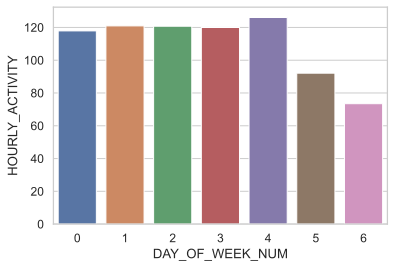

In [154]:
sns.barplot(x = mta_34_friday.index, y = "HOURLY_ACTIVITY", data = mta_34_friday )

#### FRIDAY IS THE BUSIEST!
#### DOUBLE CONFIRMED that our hypothesis about "Fridays are the peak" is correct.



In [145]:
mta_34_hourly["HOUR_OF_DAY"] = pd.to_datetime(mta_34_hourly["DATE_TIME"]).dt.hour  # do hour dt.hour


mta_34_best_hour  = mta_34_hourly.groupby(["HOUR_OF_DAY"])[["HOURLY_ACTIVITY"]].mean()
mta_34_best_hour
# 18 is the busiest hour

,HOURLY_ACTIVITY
HOUR_OF_DAY,
0,68.193865
1,55.319035
2,46.794602
3,17.370130
4,9.057435
5,8.318182
6,22.189379
7,48.131933
8,88.512864


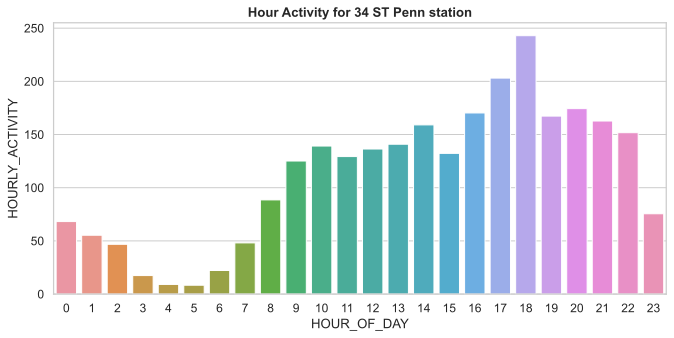

In [189]:
plt.figure(figsize=(11,5))

sns.barplot(x = mta_34_best_hour.index, y = "HOURLY_ACTIVITY", data = mta_34_best_hour  )
plt.title('Hour Activity for 34 ST Penn station' ,weight='bold')
plt.savefig("./Charts/Hour_34Penn.png", dpi=fig.dpi, bbox_inches="tight")



Text(0.5, 1.0, 'MTA 34 Penn Best Hour')

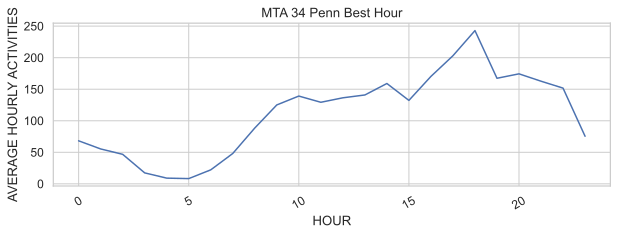

In [146]:
# make chart (plt)

plt.figure(figsize=(10,3))
plt.plot(mta_34_best_hour.index,mta_34_best_hour["HOURLY_ACTIVITY"])

plt.xlabel('HOUR')
plt.ylabel('AVERAGE HOURLY ACTIVITIES')

plt.xticks(rotation=30)  # turn it to wont be overlapped

plt.title('MTA 34 Penn Best Hour')

Text(0.5, 0, 'HOUR')

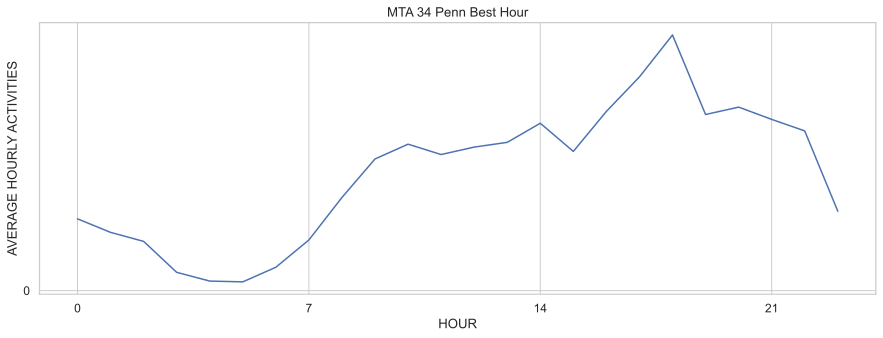

In [147]:
# make chart (plt)


fig, ax = plt.subplots(figsize=[15,5])  # 20,8
ax.plot(mta_34_best_hour.index ,mta_34_best_hour['HOURLY_ACTIVITY'])
ax.yaxis.set_major_locator(ticker.MultipleLocator(500000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

#ticks_x = np.linspace(0, 23, 23)        
#ax.xticks(ticks_x, ["labelname1", "labelname2"])

#plt.xticks(rotation = 45)
ax.set_title('MTA 34 Penn Best Hour')
ax.set_ylabel('AVERAGE HOURLY ACTIVITIES')
ax.set_xlabel('HOUR')

(array([0.01278715, 0.00426238, 0.        , 0.00426238, 0.00852477,
        0.        , 0.00852477, 0.        , 0.00426238, 0.        ,
        0.        , 0.00426238, 0.00852477, 0.01278715, 0.00426238,
        0.00852477, 0.01278715, 0.        , 0.        , 0.00426238,
        0.        , 0.        , 0.        , 0.00426238]),
 array([  8.31818182,  18.09362051,  27.86905919,  37.64449788,
         47.41993657,  57.19537525,  66.97081394,  76.74625263,
         86.52169131,  96.29713   , 106.07256869, 115.84800737,
        125.62344606, 135.39888475, 145.17432344, 154.94976212,
        164.72520081, 174.5006395 , 184.27607818, 194.05151687,
        203.82695556, 213.60239424, 223.37783293, 233.15327162,
        242.9287103 ]),
 <BarContainer object of 24 artists>)

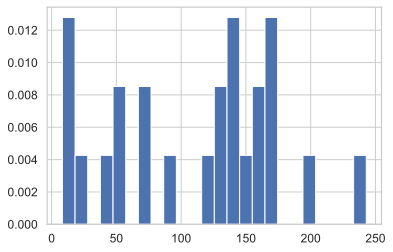

In [148]:
plt.hist(mta_34_best_hour, bins = 24, density = True ) 

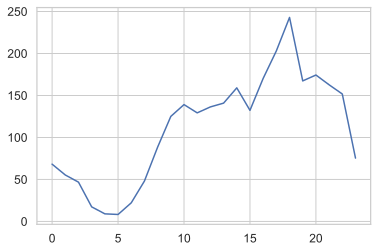

In [149]:
plt.plot(mta_34_best_hour) 

<AxesSubplot:ylabel='Count'>

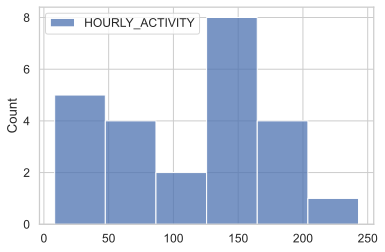

In [150]:
sns.histplot(mta_34_best_hour)